In [1]:
import pandas as pd
import numpy as np
import pickle

import math
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
# Set font file path
font_path = '/data/XXX/ttf/Times New Roman.ttf'
# font = FontProperties(fname=font_path, size=12)

from collections import Counter
from itertools import chain
from scipy.optimize import curve_fit
import powerlaw

from rapidfuzz import process, fuzz
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('/data/huggingface/hub/sentence-transformers_all-MiniLM-L6-v2')
import oracledb
connection = oracledb.connect(user="", password="", host="",port=1521,service_name=) # deleted because security

import oracledb
from sqlalchemy import create_engine
import cx_Oracle
from tqdm import tqdm
# 第一次要运行这句
# 下载地址 https://www.oracle.com/database/technologies/instant-client/winx64-64-downloads.html
# 下载Basic Package
# cx_Oracle.init_oracle_client(lib_dir= r"/data/cx_oracle/instantclient-basic-linux.x64-12.2.0.1.0/instantclient_12_2")

from sentence_transformers.util import cos_sim
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from powerlaw import Fit, plot_pdf

from tqdm import tqdm
import re
import os

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_curve,precision_recall_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
# 下载NLTK的punkt数据
nltk.download('punkt')
stemmer = PorterStemmer()

def get_dict(x,dictionary):
    return [dictionary[str(item)] for item in x]
def get_larger(x,number):
    return [item for item in x if item>number]
def compare_larger(x,number):
    return any([item>number for item in x])
def convert_date(x):
    try:
        date=pd.Timestamp(x)
    except:
        date=pd.Timestamp(x.split('-')[0]+'-01-01')
    return date


[nltk_data] Error loading punkt: <urlopen error [Errno 111] Connection
[nltk_data]     refused>


In [186]:
df_tls901_filting=pd.read_csv('data/tls901_filting.csv')
df_tls901_filting=df_tls901_filting.drop_duplicates()
list_tls901_filting_appln_id=df_tls901_filting['appln_id'].astype(str).unique()
df_tls901_filting

,appln_filing_year,appln_auth,appln_id
0,2007,EP,144
3,2008,EP,217
4,2001,EP,16
9,2002,EP,25
23,2002,EP,32
...,...,...,...
39416470,2020,CN,556845644
39416471,2020,KR,560077487
39416475,2020,TW,562113122
39416476,2021,DE,566482136


In [3]:
# df_scopus = pd.read_sql(sql='SELECT t."eid", t."doi", t."title", t."coverDate", t."afid", t."affilname",\
#         t."affiliation_city", t."affiliation_country", t."author_count",\
#         t."author_names", t."author_ids", t."author_afids",  t."citedby_count",\
#         t."openaccess", t."freetoread", t."freetoreadLabel", t."fund_acr", t."fund_no",\
#         t."fund_sponsor" FROM "biotechnology_paper_basic_info" t', con=connection)
df_scopus=pd.read_pickle('data/biotechnology_paper_basic_info.pickle')
df_scopus['coverDate']=df_scopus['coverDate'].apply(lambda x:convert_date(x))
df_scopus['citedby_count']=df_scopus['citedby_count'].astype(int)
df_scopus

,eid,doi,title,coverDate,afid,affilname,affiliation_city,affiliation_country,author_count,author_names,author_ids,author_afids,citedby_count,openaccess,freetoread,freetoreadLabel,fund_acr,fund_no,fund_sponsor
0,2-s2.0-84991318817,10.1007/s13205-015-0303-8,Screening and structure-based modeling of T-ce...,2015-12-01,60097662;60094550;60009689,"JH Government Post Graduate College, Betul;Man...",Betul;Aligarh;Gwalior,India;India;India,2.0,"Kamthania, Mohit;Sharma, D. K.",55479937900;57206773481,60094550-60009689;60097662,16,1,repositoryvor,Green,None,undefined,None
1,2-s2.0-84982787473,10.1007/s13205-015-0296-3,Antioxidant activity and structural features o...,2015-12-01,60099701;60095158;60030482;100318031,Acharya Brojendra Nath Seal College;Hooghly Mo...,Cooch Behar;Hooghly;Bardhaman;Durgapur,India;India;India;India,5.0,"Ghosh, Tuhin;Basu, Ankita;Adhikari, Dipan;Roy,...",57197638841;7402167211;57213724746;57193908340...,100318031;60030482;60095158;60099701;100318031,20,1,repositoryam,Green,UGC,F.PSW-70/12-13(ERO),University Grants Commission
2,2-s2.0-84988386029,10.1007/s13205-014-0272-3,Eco-friendly and green synthesis of silver nan...,2015-10-22,60023968,Kakatiya University,Warangal,India,3.0,"Kagithoju, Srikanth;Godishala, Vikram;Nanna, R...",55584286700;55584120800;39762350700,60023968;60023968;60023968,36,1,repositoryvor,Green,None,undefined,None
3,2-s2.0-84983779033,10.1007/s13205-014-0271-4,An alternative method for production of microa...,2015-10-22,60027171,Annamalai University,Chidambaram,India,3.0,"Surendhiran, Duraiarasan;Sirajunnisa, Abdul Ra...",55735347700;56034893200;24468826200,60027171;60027171;60027171,22,1,repositoryvor,Green,None,undefined,None
4,2-s2.0-85016090291,10.1007/s13205-014-0231-z,Structure-based functional annotation of putat...,2015-06-22,60020458,Jamia Millia Islamia,New Delhi,India,3.0,"Shahbaaz, Mohd;Ahmad, Faizan;Imtaiyaz Hassan, Md",56039303200;56108326000;7401625549,60020458;60020458;60020458,17,1,repositoryvor,Green,ICMR,BIC/12(04)/2012,Indian Council of Medical Research
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29442718,2-s2.0-0022312055,None,Analysis of the level of knowledge on diet in ...,1985-01-01,120108634.0,Zakladu Szkolenia i Oswiaty Zdrowotnej Instytu...,Warsaw,Poland,2,"Kuskowska-Wolk, A.;Puncewicz, B.",6602097024;6603405065,120108634;120108634,0,0,None,None,None,undefined,None
29442719,2-s2.0-0022295156,None,Assessment of dietary intake in diabetics,1985-01-01,120108634.0,Zakladu Szkolenia i Oswiaty Zdrowotnej Instytu...,Warsaw,Poland,2,"Kuskowska-Wolk, A.;Ilinska-Debniak, K.",6602097024;6506557146,120108634;120108634,0,0,None,None,None,undefined,None
29442720,2-s2.0-0021857140,None,Contents of ascorbic acid and 2-ascorbichydros...,1985-01-01,60021858.0,Uniwersytet Mikołaja Kopernika w Toruniu,Torun,Poland,3,"Gniot-Szulzycka, J.;Korzycka, W.;Stefanska, J.",6701780216;6504020998;6603414444,60021858;60021858;60021858,0,0,None,None,None,undefined,None
29442721,2-s2.0-85142401310,10.1017/S0967199422000284,Supplementation of porcine in vitro maturation...,2022-12-01,60120852;60115175;60019444;60010818,JSR Genetics Ltd;Topigs Norsvin;Canterbury Chr...,Driffield;Helvoirt;Canterbury;Canterbury,United Kingdom;Netherlands;United Kingdom;Unit...,10.0,"Serrano Albal, María;Silvestri, Giuseppe;Kiazi...",57220602738;57196370255;57202201190;5722655303...,60010818;60010818;60010818;60019444;60115175;6...,1,1,publisherhybridgold,Hybrid Gold,None,undefined,None


In [4]:
query = 'SELECT t.* FROM "biotechnology_author" t '
# df_patstat=pd.read_sql(query, connection)
df_patstat_author=pd.read_pickle('data/df_patstat.pickle')
df_patstat_author=df_patstat_author[df_patstat_author['person_id'].notnull()]
df_patstat_author['person_id']=df_patstat_author['person_id'].astype(int).astype(str)
df_patstat_author['psn_id']=df_patstat_author['psn_id'].astype(int).astype(str)
df_patstat_author['appln_id']=df_patstat_author['appln_id'].astype(int).astype(str)
df_patstat_author

,appln_id,person_id,invt_seq_nr,psn_name,psn_id,psn_sector,person_address
8,15763360,16,0.0,MRC (MEDICAL RESEARCH COUNCIL),22672891,GOV NON-PROFIT,"20 Park Crescent,London W1N 4AL"
11,15768652,16,0.0,MRC (MEDICAL RESEARCH COUNCIL),22672891,GOV NON-PROFIT,"20 Park Crescent,London W1N 4AL"
15,15772733,16,0.0,MRC (MEDICAL RESEARCH COUNCIL),22672891,GOV NON-PROFIT,"20 Park Crescent,London W1N 4AL"
24,15972133,16,0.0,MRC (MEDICAL RESEARCH COUNCIL),22672891,GOV NON-PROFIT,"20 Park Crescent,London W1N 4AL"
26,15978103,16,0.0,MRC (MEDICAL RESEARCH COUNCIL),22672891,GOV NON-PROFIT,"20 Park Crescent,London W1N 4AL"
...,...,...,...,...,...,...,...
40251181,567558584,85453972,0.0,"SHANGYAOTANG BIG HEALTH INDUSTRY GROUP CO., LTD.",185453972,UNKNOWN,None
40251187,557454227,85454359,5.0,SHE KEPENG,185454359,UNKNOWN,None
40251190,564771023,85438757,1.0,JAMES O. DAVIS,185438757,UNKNOWN,None
40251192,571323564,85440714,1.0,Richard Gagliardo,185440714,UNKNOWN,None


In [5]:
# query = 'SELECT t.* FROM "biotechnology_basic_info" t '
# df_info=pd.read_sql(query, connection)
# df_info.to_pickle('data/df_info.pickle')
df_info=pd.read_pickle('data/df_info.pickle')
df_info['appln_id']=df_info['appln_id'].astype(int).astype(str)
df_info

,appln_id,appln_auth,appln_nr,appln_kind,appln_filing_date,appln_filing_year,appln_nr_original,ipr_type,receiving_office,internat_appln_id,...,earliest_publn_date,earliest_publn_year,earliest_pat_publn_id,granted,docdb_family_id,inpadoc_family_id,docdb_family_size,nb_citing_docdb_fam,nb_applicants,nb_inventors
0,72,EP,04799975,A,2004-11-01 00:00:00,2004,04799975,PI,,39982171,...,2006-08-23 00:00:00,2006,283233012,Y,36676151,72,8,0,2,2
1,79,EP,05023512,A,2005-10-27 00:00:00,2005,05023512,PI,,0,...,2006-05-10 00:00:00,2006,281372800,Y,35677469,79,4,2,1,1
2,88,EP,05715031,A,2005-02-27 00:00:00,2005,05715031,PI,,14915915,...,2006-11-08 00:00:00,2006,283072913,Y,37818140,88,16,66,1,1
3,116,EP,06706886,A,2006-02-13 00:00:00,2006,06706886,PI,,17500685,...,2007-11-07 00:00:00,2007,280885333,Y,34933703,116,11,18,1,4
4,119,EP,06753961,A,2006-05-30 00:00:00,2006,06753961,PI,,17504472,...,2008-06-25 00:00:00,2008,279972414,Y,37000110,119,10,34,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10676891,575014548,CN,202121421775,U,2021-06-24 00:00:00,2021,202121421775,UM,,0,...,2022-07-01 00:00:00,2022,575014549,Y,82121976,575014548,1,0,0,0
10676892,575014578,CN,202120539293,U,2021-03-16 00:00:00,2021,202120539293,UM,,0,...,2022-07-01 00:00:00,2022,575014579,Y,75539902,548993159,6,9,1,6
10676893,575014590,CN,202121439309,U,2021-06-28 00:00:00,2021,202121439309,UM,,0,...,2022-07-01 00:00:00,2022,575014591,Y,82121995,575014590,1,0,0,0
10676894,575014598,CN,202122451292,U,2021-10-12 00:00:00,2021,202122451292,UM,,0,...,2022-07-01 00:00:00,2022,575014599,Y,82121999,575014598,1,0,0,0


In [6]:
# query = 'SELECT t.* FROM "biotechnology_citation" t '
# df_citation=pd.read_sql(query, connection)
# df_citation.to_pickle('data/biotechnology_citation.pickle')
df_citation=pd.read_pickle('data/biotechnology_citation.pickle')
df_citation['appln_id']=df_citation['appln_id'].astype(str)
df_citation['cited_appln_id']=df_citation['cited_appln_id'].astype(str)
df_citation

,appln_id,cited_appln_id,appln_filing_date,cited_appln_filing_date
0,58003622,51579672,2008-01-25 00:00:00,2000-03-16 00:00:00
1,530626640,50699641,2020-01-08 00:00:00,2006-04-28 00:00:00
2,437637376,53064399,2014-09-16 00:00:00,2007-03-28 00:00:00
3,407533390,4907984,2011-09-07 00:00:00,2005-10-19 00:00:00
4,336735820,50040999,2011-03-08 00:00:00,2003-02-04 00:00:00
...,...,...,...,...
66505530,52943861,51096435,2003-11-13 00:00:00,1995-06-05 00:00:00
66505531,484399662,449826595,2017-03-23 00:00:00,2013-10-04 00:00:00
66505532,15795899,11266514,2000-12-08 00:00:00,1993-07-28 00:00:00
66505533,527075716,450970980,2019-11-20 00:00:00,2015-12-24 00:00:00


In [7]:
df_citation['delta']=df_citation['appln_filing_date'] - df_citation['cited_appln_filing_date']
df_citation['delta']=df_citation['delta'].apply(lambda x:x.days/365)

In [8]:
df_citation[df_citation['cited_appln_id']=='6675034']

,appln_id,cited_appln_id,appln_filing_date,cited_appln_filing_date,delta
33376159,470494614,6675034,2016-05-20 00:00:00,2001-12-28 00:00:00,14.402740
33416349,416327266,6675034,2013-11-22 00:00:00,2001-12-28 00:00:00,11.909589
33632009,413720941,6675034,2013-09-23 00:00:00,2001-12-28 00:00:00,11.745205
33741635,423324732,6675034,2014-08-06 00:00:00,2001-12-28 00:00:00,12.613699


In [9]:
df_citation_5year=df_citation[df_citation['delta']<5].groupby(['cited_appln_id']).agg(citation_count_5year=('appln_id','count')).reset_index()
df_citation_5year

,cited_appln_id,citation_count_5year
0,10000128,3
1,10000173,1
2,10000208,1
3,10000250,1
4,10000270,3
...,...,...
3006933,9999322,1
3006934,99994,6
3006935,9999566,1
3006936,99996,9


In [10]:
df_match_result_with_address=pd.read_pickle('data/version/version_v1/df_all.pickle')
df_match_result_with_address.drop(columns=['invent_0_psn_name_encoding','invent_0_person_address_encoding',
                                           'person_address_encoding','affilname_encoding'],inplace=True)
df_match_result_with_address=df_match_result_with_address[
    (df_match_result_with_address['invent_0_psn_name_similarity'].apply(lambda x:compare_larger(x,0.6)))|
 (df_match_result_with_address['invent_0_person_address_similarity'].apply(lambda x:compare_larger(x,0.6)))|
    (df_match_result_with_address['person_address_similarity'].apply(lambda x:compare_larger(x,0.6)))
                                                         ]
df_match_result_with_address=df_match_result_with_address.explode(['author_name','afid',
                                                                   'affiliation_city',
                                                                   'affiliation_country',
                                                                   'affilname',
                                                                    'invent_0_psn_name_similarity',
                                                                   'invent_0_person_address_similarity',
                                                                   'person_address_similarity'])

df_match_result_with_address=df_match_result_with_address.drop_duplicates(['author_id','psn_id_matching','appln_id_matching','eid_matching'])
df_match_result_with_address=df_match_result_with_address[df_match_result_with_address['affilname'].notnull()]
df_match_result_with_address=df_match_result_with_address.reset_index(drop=True)
df_match_result_with_address

,labels,author_id,psn_id_matching,psn_id_matching_name,scopus_matching_name,appln_id_matching,eid_matching,doi_matching,title_scopus_matching,title_patstat_matching,...,psn_name,person_address,author_name,afid,affiliation_city,affiliation_country,affilname,invent_0_psn_name_similarity,invent_0_person_address_similarity,person_address_similarity
0,651,57632820300,36079383,Yamamoto; Itsuo,"Yamamoto, Itsuo",52568004,2-s2.0-0031763766,10.1080/028418698430458,"Relevance of a new impedance matching, or subt...",Apparatus for high-frequency hyperthermia,...,YAMAMOTO; ITSUO,"Yao-shi, Osaka","Yamamoto, Itsuo",100613492,Osaka,Japan,Yamamoto Vinita Co. Ltd.,0.648776,0.370988,0.370988
1,651,57632820300,36072517,"Yamamoto, Itsuo","Yamamoto, Itsuo",52568004,2-s2.0-0031763766,10.1080/028418698430458,"Relevance of a new impedance matching, or subt...",Apparatus for high-frequency hyperthermia,...,"YAMAMOTO, ITSUO","Yao-shi, Osaka","Yamamoto, Itsuo",100613492,Osaka,Japan,Yamamoto Vinita Co. Ltd.,0.648776,0.370988,0.370988
2,651,7005737279,27394585,"Robins, H. Ian","ROBINS, H. IAN",46482242,2-s2.0-0025534541,10.1007/978-1-4684-5766-7_17,Radiant heat systemic hyperthermia clinical tr...,Apparatus for inducing whole body hyperthermia...,...,"ROBINS, H. IAN",Madison,"Robins, H. I.",60016534,Madison,United States,UW Health,0.310088,0.209711,0.149398
3,651,7005737279,27394586,"Robins, H., Ian","ROBINS, H. IAN",47242438,2-s2.0-0025534541,10.1007/978-1-4684-5766-7_17,Radiant heat systemic hyperthermia clinical tr...,METHOD AND APPARATUS FOR HYPERTHERMIA TREATMENT,...,"ROBINS, H., IAN",None,"Robins, H. I.",60016534,Madison,United States,UW Health,0.310088,0.18224,0.18224
4,651,7005737279,27394585,"Robins, H. Ian","ROBINS, H. IAN",46482242,2-s2.0-0028322061,10.1016/0304-3835(94)90252-6,A new technological approach to radiant heat w...,Apparatus for inducing whole body hyperthermia...,...,"ROBINS, H. IAN",Madison,"Robins, H. I.",60016534,Madison,United States,UW Health,0.310088,0.209711,0.149398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862936,3376,55746516000,4674685,Chen Lixue,"Chen, Lixue",526521667,2-s2.0-84914682049,10.1007/s10815-014-0351-8,Does IVF cleavage stage embryo quality affect ...,System for predicting continuous pregnancy of ...,...,CHEN LIXUE,None,"CHEN, Li Xue",60121975,Beijing,China,Peking University Third Hospital,0.697546,0.037507,0.037507
862937,3376,55746516000,4674685,Chen Lixue,"Chen, Lixue",526521667,2-s2.0-85120726748,10.1016/j.rbmo.2021.07.016,Maternal and neonatal outcomes following blast...,System for predicting continuous pregnancy of ...,...,CHEN LIXUE,None,"CHEN, Li Xue",60121975,Beijing,China,Peking University Third Hospital,0.697546,0.037507,0.037507
862938,3376,55746516000,4674685,Chen Lixue,"Chen, Lixue",526521667,2-s2.0-85089862443,10.1007/s43032-020-00247-x,Pregnancy Outcomes of Single/Double Blastocyst...,System for predicting continuous pregnancy of ...,...,CHEN LIXUE,None,"CHEN, Li Xue",60121975,Beijing,China,Peking University Third Hospital,0.697546,0.037507,0.037507
862939,3376,56256023400,24547578,Otsuki Junko,"Otsuki, Junko",524285915,2-s2.0-85021428936,10.1002/rmb2.12038,Retrospective comparative study of the factors...,ANALYSIS SOFTWARE AND DEVICE FOR EMBRYO SELECTION,...,OTSUKI JUNKO,"c/o HANABUSA WOMEN'S CLINIC, 1-1-2, Sannomiya-...","Otsuki, Junko",60006108,Ibaraki,Japan,National Institute of Biomedical Innovation,0.345041,0.094858,0.218905


In [11]:
df_record=pd.read_pickle('data/df_record.pickle')
# del df_record['title_embedding']
df_record.loc[df_record['appln_id'].notnull(), 'appln_id'] = df_record.loc[df_record['appln_id'].notnull(), 'appln_id'].astype(int).astype(str)
df_record

In [192]:
df_record[df_record['appln_id'].isin(list_tls901_filting_appln_id)]

,appln_id,title,eid,doi,source_id,title_embedding,labels,appln_auth,appln_nr,appln_kind,...,author_count,author_names,author_ids,author_afids,openaccess,freetoread,freetoreadLabel,fund_acr,fund_no,fund_sponsor
0,6675034,Aquatic plant fertilizer and its production me...,NaN,NaN,NaN,"[-0.01938207, 0.09059494, -0.056675874, -0.108...",-1,CN,01139285,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,15463575,AN ENZYME AND ENZYME PREPARATION WITH ENDOGLUC...,NaN,NaN,NaN,"[0.032466024, -0.039404966, -0.06192986, 0.051...",-1,WO,9500400,W,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,17206714,SOIL AND WATER REMEDIATION AND ENHANCEMENT PRO...,NaN,NaN,NaN,"[-0.052692994, 0.018156238, 0.057793885, -0.03...",-1,EP,96929826,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,27597733,DECOMPOSITION OF 2-NAPHTHALENESULFONIC ACID,NaN,NaN,NaN,"[-0.043281436, 0.047954354, -0.041820448, -0.0...",-1,JP,4961991,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,39742737,PROCESS FOR DE-SIZING AND BLEACHING WOVEN FABR...,NaN,NaN,NaN,"[0.022980522, 0.085263304, -0.007640268, 0.003...",-1,KR,810004851,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6575532,573885104,Absorbable high-strength zinc alloy for medica...,NaN,NaN,NaN,"[-0.0770421, 0.101063825, 0.015055561, 0.00051...",-1,US,202016842835,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6575533,573885115,Tamper resistant catheter device,NaN,NaN,NaN,"[-0.055834655, 0.094606526, -0.013622771, -0.0...",-1,US,201815967420,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6575534,573885128,Wireless power receiver coil for implantable n...,NaN,NaN,NaN,"[-0.053963218, 0.07509954, -0.061199173, 0.011...",-1,US,201916508628,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6575535,573919112,METHOD FOR ISOLATING AND CULTURING CORD BLOOD ...,NaN,NaN,NaN,"[-0.044588502, -0.062603645, -0.09476462, -0.1...",-1,WO,2021018355,W,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [193]:
df_record[df_record['appln_id'].notnull()]

,appln_id,title,eid,doi,source_id,title_embedding,labels,appln_auth,appln_nr,appln_kind,...,author_count,author_names,author_ids,author_afids,openaccess,freetoread,freetoreadLabel,fund_acr,fund_no,fund_sponsor
0,6675034,Aquatic plant fertilizer and its production me...,NaN,NaN,NaN,"[-0.01938207, 0.09059494, -0.056675874, -0.108...",-1,CN,01139285,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,15463575,AN ENZYME AND ENZYME PREPARATION WITH ENDOGLUC...,NaN,NaN,NaN,"[0.032466024, -0.039404966, -0.06192986, 0.051...",-1,WO,9500400,W,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,17206714,SOIL AND WATER REMEDIATION AND ENHANCEMENT PRO...,NaN,NaN,NaN,"[-0.052692994, 0.018156238, 0.057793885, -0.03...",-1,EP,96929826,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,27597733,DECOMPOSITION OF 2-NAPHTHALENESULFONIC ACID,NaN,NaN,NaN,"[-0.043281436, 0.047954354, -0.041820448, -0.0...",-1,JP,4961991,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,39742737,PROCESS FOR DE-SIZING AND BLEACHING WOVEN FABR...,NaN,NaN,NaN,"[0.022980522, 0.085263304, -0.007640268, 0.003...",-1,KR,810004851,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6575532,573885104,Absorbable high-strength zinc alloy for medica...,NaN,NaN,NaN,"[-0.0770421, 0.101063825, 0.015055561, 0.00051...",-1,US,202016842835,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6575533,573885115,Tamper resistant catheter device,NaN,NaN,NaN,"[-0.055834655, 0.094606526, -0.013622771, -0.0...",-1,US,201815967420,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6575534,573885128,Wireless power receiver coil for implantable n...,NaN,NaN,NaN,"[-0.053963218, 0.07509954, -0.061199173, 0.011...",-1,US,201916508628,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6575535,573919112,METHOD FOR ISOLATING AND CULTURING CORD BLOOD ...,NaN,NaN,NaN,"[-0.044588502, -0.062603645, -0.09476462, -0.1...",-1,WO,2021018355,W,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [194]:
df_record.columns

Index(['appln_id', 'title', 'eid', 'doi', 'source_id', 'title_embedding',
       'labels', 'appln_auth', 'appln_nr', 'appln_kind', 'appln_filing_date',
       'appln_filing_year', 'appln_nr_original', 'ipr_type',
       'receiving_office', 'internat_appln_id', 'int_phase', 'reg_phase',
       'nat_phase', 'earliest_filing_date', 'earliest_filing_year',
       'earliest_filing_id', 'earliest_publn_date', 'earliest_publn_year',
       'earliest_pat_publn_id', 'granted', 'docdb_family_id',
       'inpadoc_family_id', 'docdb_family_size', 'nb_citing_docdb_fam',
       'nb_applicants', 'nb_inventors', 'citedby_count', 'cited_appln_id',
       'citation_count_5year', 'coverDate', 'afid', 'affilname',
       'affiliation_city', 'affiliation_country', 'author_count',
       'author_names', 'author_ids', 'author_afids', 'openaccess',
       'freetoread', 'freetoreadLabel', 'fund_acr', 'fund_no', 'fund_sponsor'],
      dtype='object')

In [195]:
tem=df_record[df_record['appln_id'].notnull()].groupby(['appln_auth','appln_filing_year']).agg(count=('appln_id','count'))

In [196]:
tem.reset_index(inplace=True)

In [197]:
tem[tem['appln_auth']=='CN']

,appln_auth,appln_filing_year,count
262,CN,1985.0,588
263,CN,1986.0,629
264,CN,1987.0,822
265,CN,1988.0,1095
266,CN,1989.0,1291
267,CN,1990.0,1733
268,CN,1991.0,2251
269,CN,1992.0,3443
270,CN,1993.0,4344
271,CN,1994.0,3945


In [12]:
with open('labels.pickle', 'rb') as f:
    labels=pickle.load(f)
    
# with open('clusterable_embedding.pickle', 'rb') as f:
#     clusterable_embedding=pickle.load(f)

In [13]:
df_record['labels']=labels
# df_record['clusterable_embedding']=list(clusterable_embedding)

In [16]:
df_record=df_record.merge(df_info,how='left',left_on='appln_id',right_on='appln_id')
df_record

,appln_id,title,eid,doi,source_id,title_embedding,labels,appln_auth,appln_nr,appln_kind,...,earliest_publn_date,earliest_publn_year,earliest_pat_publn_id,granted,docdb_family_id,inpadoc_family_id,docdb_family_size,nb_citing_docdb_fam,nb_applicants,nb_inventors
0,6675034,Aquatic plant fertilizer and its production me...,NaN,NaN,NaN,"[-0.01938207, 0.09059494, -0.056675874, -0.108...",-1,CN,01139285,A,...,2003-07-09 00:00:00,2003.0,286547315.0,N,4675207.0,6675034.0,1.0,4.0,1.0,1.0
1,15463575,AN ENZYME AND ENZYME PREPARATION WITH ENDOGLUC...,NaN,NaN,NaN,"[0.032466024, -0.039404966, -0.06192986, 0.051...",-1,WO,9500400,W,...,1996-04-18 00:00:00,1996.0,299028046.0,Y,26065315.0,404293.0,9.0,435.0,7.0,6.0
2,17206714,SOIL AND WATER REMEDIATION AND ENHANCEMENT PRO...,NaN,NaN,NaN,"[-0.052692994, 0.018156238, 0.057793885, -0.03...",-1,EP,96929826,A,...,1998-11-11 00:00:00,1998.0,297713822.0,Y,24074238.0,1325092.0,17.0,16.0,1.0,1.0
3,27597733,DECOMPOSITION OF 2-NAPHTHALENESULFONIC ACID,NaN,NaN,NaN,"[-0.043281436, 0.047954354, -0.041820448, -0.0...",-1,JP,4961991,A,...,1994-02-22 00:00:00,1994.0,301349790.0,N,12836252.0,27597733.0,1.0,0.0,2.0,3.0
4,39742737,PROCESS FOR DE-SIZING AND BLEACHING WOVEN FABR...,NaN,NaN,NaN,"[0.022980522, 0.085263304, -0.007640268, 0.003...",-1,KR,810004851,A,...,1983-11-09 00:00:00,1983.0,444841751.0,Y,9249673.0,1124436.0,14.0,13.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29545075,NaN,Relative expression of the developmentally imp...,2-s2.0-85125811955,10.1017/S0967199421000976,19073.0,"[-0.0929608, -0.021178935, -0.072981216, -0.01...",3356,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29545076,NaN,Advancements in mammalian X and y sperm differ...,2-s2.0-85125791972,10.1017/S0967199421000939,19073.0,"[-0.0072978716, 0.015270151, -0.031556655, -0....",-1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29545077,NaN,Effect of melatonin on the clinical outcome of...,2-s2.0-85125769983,10.1017/S0967199421000770,19073.0,"[0.026419124, 0.049893636, 0.032035816, 0.0320...",-1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29545078,NaN,Expression of genes associated with fertility ...,2-s2.0-85123940284,10.1017/S0967199421000745,19073.0,"[-0.010753157, -0.07279501, -0.026000984, 0.06...",-1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# 添加引用
df_record=df_record.merge(df_scopus[['eid','citedby_count']],how='left',left_on='eid',right_on='eid')
df_record=df_record.merge(df_citation_5year,how='left',left_on='appln_id',right_on='cited_appln_id')


In [18]:
# df_record=df_record[df_record['labels']>100].reset_index()
df_record.loc[(df_record['appln_id'].notnull())&(df_record['citation_count_5year'].isnull()),'citation_count_5year']=0 
df_record.loc[(df_record['eid'].notnull())&(df_record['citedby_count'].isnull()),'citedby_count']=0 
df_record

,appln_id,title,eid,doi,source_id,title_embedding,labels,appln_auth,appln_nr,appln_kind,...,granted,docdb_family_id,inpadoc_family_id,docdb_family_size,nb_citing_docdb_fam,nb_applicants,nb_inventors,citedby_count,cited_appln_id,citation_count_5year
0,6675034,Aquatic plant fertilizer and its production me...,NaN,NaN,NaN,"[-0.01938207, 0.09059494, -0.056675874, -0.108...",-1,CN,01139285,A,...,N,4675207.0,6675034.0,1.0,4.0,1.0,1.0,NaN,NaN,0.0
1,15463575,AN ENZYME AND ENZYME PREPARATION WITH ENDOGLUC...,NaN,NaN,NaN,"[0.032466024, -0.039404966, -0.06192986, 0.051...",-1,WO,9500400,W,...,Y,26065315.0,404293.0,9.0,435.0,7.0,6.0,NaN,15463575,37.0
2,17206714,SOIL AND WATER REMEDIATION AND ENHANCEMENT PRO...,NaN,NaN,NaN,"[-0.052692994, 0.018156238, 0.057793885, -0.03...",-1,EP,96929826,A,...,Y,24074238.0,1325092.0,17.0,16.0,1.0,1.0,NaN,NaN,0.0
3,27597733,DECOMPOSITION OF 2-NAPHTHALENESULFONIC ACID,NaN,NaN,NaN,"[-0.043281436, 0.047954354, -0.041820448, -0.0...",-1,JP,4961991,A,...,N,12836252.0,27597733.0,1.0,0.0,2.0,3.0,NaN,NaN,0.0
4,39742737,PROCESS FOR DE-SIZING AND BLEACHING WOVEN FABR...,NaN,NaN,NaN,"[0.022980522, 0.085263304, -0.007640268, 0.003...",-1,KR,810004851,A,...,Y,9249673.0,1124436.0,14.0,13.0,1.0,1.0,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29545085,NaN,Relative expression of the developmentally imp...,2-s2.0-85125811955,10.1017/S0967199421000976,19073.0,"[-0.0929608, -0.021178935, -0.072981216, -0.01...",3356,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
29545086,NaN,Advancements in mammalian X and y sperm differ...,2-s2.0-85125791972,10.1017/S0967199421000939,19073.0,"[-0.0072978716, 0.015270151, -0.031556655, -0....",-1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
29545087,NaN,Effect of melatonin on the clinical outcome of...,2-s2.0-85125769983,10.1017/S0967199421000770,19073.0,"[0.026419124, 0.049893636, 0.032035816, 0.0320...",-1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN
29545088,NaN,Expression of genes associated with fertility ...,2-s2.0-85123940284,10.1017/S0967199421000745,19073.0,"[-0.010753157, -0.07279501, -0.026000984, 0.06...",-1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN


In [19]:
print('论文数量:',len(df_match_result_with_address['eid_matching'].unique()))
print('专利数量:',len(df_match_result_with_address['appln_id_matching'].unique()))
print('论文对数量:',len(df_match_result_with_address.drop_duplicates(['appln_id_matching','eid_matching'])))
print('学术发明家的学者数量:',len(df_match_result_with_address['author_id'].unique()))
print('学术发明家的发明家数量:',len(df_match_result_with_address['psn_id_matching'].unique()))


论文数量: 422152
专利数量: 82481
论文对数量: 720491
学术发明家的学者数量: 106150
学术发明家的发明家数量: 102538


In [20]:
df_match_result_with_address.columns

Index(['labels', 'author_id', 'psn_id_matching', 'psn_id_matching_name',
       'scopus_matching_name', 'appln_id_matching', 'eid_matching',
       'doi_matching', 'title_scopus_matching', 'title_patstat_matching',
       'score_matching', 'invent_0_appln_id', 'invent_0_person_id',
       'invent_0_invt_seq_nr', 'invent_0_psn_id', 'invent_0_psn_name',
       'invent_0_person_address', 'appln_id', 'person_id', 'invt_seq_nr',
       'psn_id', 'psn_name', 'person_address', 'author_name', 'afid',
       'affiliation_city', 'affiliation_country', 'affilname',
       'invent_0_psn_name_similarity', 'invent_0_person_address_similarity',
       'person_address_similarity'],
      dtype='object')

In [21]:
df_record=df_record.merge(df_scopus[[ 'eid','coverDate', 'afid', 'affilname', 'affiliation_city', 'affiliation_country', 'author_count', 'author_names', 
            'author_ids', 'author_afids',   'openaccess', 'freetoread', 'freetoreadLabel', 'fund_acr', 'fund_no', 'fund_sponsor']],
                         how='left',left_on='eid',right_on='eid')

In [22]:
df_match_result_with_address.columns

Index(['labels', 'author_id', 'psn_id_matching', 'psn_id_matching_name',
       'scopus_matching_name', 'appln_id_matching', 'eid_matching',
       'doi_matching', 'title_scopus_matching', 'title_patstat_matching',
       'score_matching', 'invent_0_appln_id', 'invent_0_person_id',
       'invent_0_invt_seq_nr', 'invent_0_psn_id', 'invent_0_psn_name',
       'invent_0_person_address', 'appln_id', 'person_id', 'invt_seq_nr',
       'psn_id', 'psn_name', 'person_address', 'author_name', 'afid',
       'affiliation_city', 'affiliation_country', 'affilname',
       'invent_0_psn_name_similarity', 'invent_0_person_address_similarity',
       'person_address_similarity'],
      dtype='object')

In [23]:
df_match_result_with_address=df_match_result_with_address.merge(df_scopus[['eid','citedby_count']],how='left',left_on='eid_matching',right_on='eid',how='left')
df_match_result_with_address=df_match_result_with_address.merge(df_citation_5year,how='left',left_on='appln_id_matching',right_on='cited_appln_id',how='left')
df_match_result_with_address

,labels,author_id,psn_id_matching,psn_id_matching_name,scopus_matching_name,appln_id_matching,eid_matching,doi_matching,title_scopus_matching,title_patstat_matching,...,affiliation_city,affiliation_country,affilname,invent_0_psn_name_similarity,invent_0_person_address_similarity,person_address_similarity,eid,citedby_count,cited_appln_id,citation_count_5year
0,651,57632820300,36079383,Yamamoto; Itsuo,"Yamamoto, Itsuo",52568004,2-s2.0-0031763766,10.1080/028418698430458,"Relevance of a new impedance matching, or subt...",Apparatus for high-frequency hyperthermia,...,Osaka,Japan,Yamamoto Vinita Co. Ltd.,0.648776,0.370988,0.370988,2-s2.0-0031763766,1,52568004,3.0
1,651,57632820300,36072517,"Yamamoto, Itsuo","Yamamoto, Itsuo",52568004,2-s2.0-0031763766,10.1080/028418698430458,"Relevance of a new impedance matching, or subt...",Apparatus for high-frequency hyperthermia,...,Osaka,Japan,Yamamoto Vinita Co. Ltd.,0.648776,0.370988,0.370988,2-s2.0-0031763766,1,52568004,3.0
2,651,7005737279,27394585,"Robins, H. Ian","ROBINS, H. IAN",46482242,2-s2.0-0025534541,10.1007/978-1-4684-5766-7_17,Radiant heat systemic hyperthermia clinical tr...,Apparatus for inducing whole body hyperthermia...,...,Madison,United States,UW Health,0.310088,0.209711,0.149398,2-s2.0-0025534541,3,46482242,2.0
3,651,7005737279,27394586,"Robins, H., Ian","ROBINS, H. IAN",47242438,2-s2.0-0025534541,10.1007/978-1-4684-5766-7_17,Radiant heat systemic hyperthermia clinical tr...,METHOD AND APPARATUS FOR HYPERTHERMIA TREATMENT,...,Madison,United States,UW Health,0.310088,0.18224,0.18224,2-s2.0-0025534541,3,NaN,NaN
4,651,7005737279,27394585,"Robins, H. Ian","ROBINS, H. IAN",46482242,2-s2.0-0028322061,10.1016/0304-3835(94)90252-6,A new technological approach to radiant heat w...,Apparatus for inducing whole body hyperthermia...,...,Madison,United States,UW Health,0.310088,0.209711,0.149398,2-s2.0-0028322061,44,46482242,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862936,3376,55746516000,4674685,Chen Lixue,"Chen, Lixue",526521667,2-s2.0-84914682049,10.1007/s10815-014-0351-8,Does IVF cleavage stage embryo quality affect ...,System for predicting continuous pregnancy of ...,...,Beijing,China,Peking University Third Hospital,0.697546,0.037507,0.037507,2-s2.0-84914682049,34,NaN,NaN
862937,3376,55746516000,4674685,Chen Lixue,"Chen, Lixue",526521667,2-s2.0-85120726748,10.1016/j.rbmo.2021.07.016,Maternal and neonatal outcomes following blast...,System for predicting continuous pregnancy of ...,...,Beijing,China,Peking University Third Hospital,0.697546,0.037507,0.037507,2-s2.0-85120726748,2,NaN,NaN
862938,3376,55746516000,4674685,Chen Lixue,"Chen, Lixue",526521667,2-s2.0-85089862443,10.1007/s43032-020-00247-x,Pregnancy Outcomes of Single/Double Blastocyst...,System for predicting continuous pregnancy of ...,...,Beijing,China,Peking University Third Hospital,0.697546,0.037507,0.037507,2-s2.0-85089862443,8,NaN,NaN
862939,3376,56256023400,24547578,Otsuki Junko,"Otsuki, Junko",524285915,2-s2.0-85021428936,10.1002/rmb2.12038,Retrospective comparative study of the factors...,ANALYSIS SOFTWARE AND DEVICE FOR EMBRYO SELECTION,...,Ibaraki,Japan,National Institute of Biomedical Innovation,0.345041,0.094858,0.218905,2-s2.0-85021428936,7,NaN,NaN


In [25]:
df_match_result_with_address=df_match_result_with_address.merge(df_scopus[['eid','coverDate']],left_on='eid',right_on='eid')
df_match_result_with_address=df_match_result_with_address.merge(df_record[['appln_id','appln_filing_date']],left_on='appln_id',right_on='appln_id')

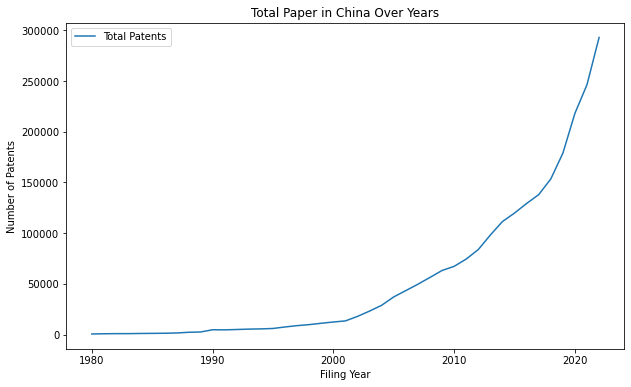

In [84]:
df_plot=Counter(df_scopus[df_scopus['affiliation_country'].str.contains('China',na=False)]['coverDate'].apply(lambda x:x.year))
df_plot = pd.DataFrame(list(df_plot.items()), columns=['year', 'count'])
df_plot=df_plot.sort_values('year')

# 绘制折线图和柱状图合一的图
plt.figure(figsize=(10, 6))

# 柱状图
plt.plot(df_plot['year'], df_plot['count'], marker='', label='Total Patents')

# 设置图表标题和标签
plt.title('Total Paper in China Over Years')
plt.xlabel('Filing Year')
plt.ylabel('Number of Patents')

# 显示图例
plt.legend()

# 显示图表
plt.show()

In [29]:
t3=pd.read_pickle('data/t3.pickle')
t3=t3.reset_index(level=1)
t3.columns=['author_idx','author_id','author_name']
t3=t3.merge(df_scopus[['eid']],left_index=True,right_index=True,how='left')
t3

,author_idx,author_id,author_name,eid
0,0,55479937900,"Kamthania, Mohit",2-s2.0-84991318817
0,1,57206773481,"Sharma, D. K.",2-s2.0-84991318817
1,0,57197638841,"Ghosh, Tuhin",2-s2.0-84982787473
1,1,7402167211,"Basu, Ankita",2-s2.0-84982787473
1,2,57213724746,"Adhikari, Dipan",2-s2.0-84982787473
...,...,...,...,...
29442721,9,55845463100,"Griffin, Darren K.",2-s2.0-85142401310
29442722,0,57917416100,"Hashimoto, Shizuya",2-s2.0-85133137634
29442722,1,57917450100,"Kinjo, Keita",2-s2.0-85133137634
29442722,2,55689793000,"Saito, Takako",2-s2.0-85133137634


# 发明机构分布

In [30]:
match_country=df_match_result_with_address.groupby('afid').agg(affiliation_country=('affiliation_country',lambda x:list(set(x))))
match_name=df_match_result_with_address.groupby('afid').agg(affilname=('affilname',lambda x:list(x)[0]))
dict_count=Counter(df_match_result_with_address.drop_duplicates(['author_id','appln_id_matching','doi_matching'])['afid'])
match_count=pd.DataFrame(list(dict_count.items()), columns=['afid', 'count']).set_index(['afid'])
match_count

,count
afid,
100613492,1
60016534,412
60032179,2072
115554255,7
60170442,1
...,...
107932839,1
60088062,1
101865002,27


In [31]:
df_count_affil=pd.concat([match_name,match_country,match_count],axis=1).sort_values(['count'],ascending=False)
df_count_affil=df_count_affil.explode(['affiliation_country'])
df_count_affil.to_csv('describe/count_affil.csv',encoding='utf-8-sig')
df_count_affil

,affilname,affiliation_country,count
afid,,,
60002746,ca M&eacute,United States,6769
60001117,National Institutes of Health (NIH),United States,6190
60007995,mica e Biol&oacute,United States,5819
60005558,"gica, Universidade Nova de Lisboa",United States,5770
60017705,Chinese Academy of Agricultural Sciences,China,5046
...,...,...,...
113073471,DNA Forensic Division,South Korea,1
113073262,Beijing Institute of Basic Medical Sciences,China,1
113068579,"Pharmaceutical Co., Ltd.",Japan,1


In [264]:
country_counts

Other            4910
China            3768
United States    3459
Japan            1280
South Korea       785
Name: affiliation_country, dtype: int64

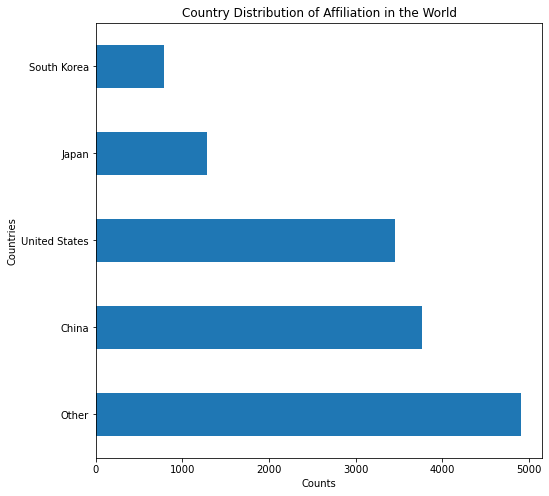

In [263]:
df=df_count_affil.copy()
# 计算每个国家的数量
country_counts = df['affiliation_country'].value_counts()

# 将占比小于百分之5的国家合并成一类命名为“其他”
threshold = 0.05
other_countries = country_counts[country_counts / country_counts.sum() < threshold].index
df['affiliation_country'] = df['affiliation_country'].replace(other_countries, 'Other')

# 重新计算每个国家的数量
country_counts = df['affiliation_country'].value_counts()

# 创建扇形图
plt.figure(figsize=(8, 8))
# plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%', startangle=140)
# Create a stacked horizontal bar plot
country_counts.plot(kind='barh', stacked=True)

# Adding labels and title
plt.xlabel('Counts')
plt.ylabel('Countries')
plt.title('Stacked Horizontal Bar Chart Representation')

# Show the plot
# 设置图表标题
plt.title("Country Distribution of Affiliation in the World")

# 显示图表
plt.show()

# 发明家分布

In [258]:
match_country=df_match_result_with_address.groupby('author_id').agg(affiliation_country=('affiliation_country',lambda x:list(set(x))))
match_name=df_match_result_with_address.groupby('author_id').agg(scopus_matching_name=('scopus_matching_name',lambda x:list(x)[0]))
dict_count=Counter(df_match_result_with_address.drop_duplicates(['author_id','appln_id_matching','doi_matching'])['author_id'])
match_count=pd.DataFrame(list(dict_count.items()), columns=['author_id', 'count']).set_index('author_id')

In [259]:
df_count_author=pd.concat([match_name,match_country,match_count],axis=1).sort_values(['count'],ascending=False)
df_count_author=df_count_author.explode(['affiliation_country'])
df_count_author.to_csv('describe/count_author.csv',encoding='utf-8-sig')
df_count_author

,scopus_matching_name,affiliation_country,count
author_id,,,
35432875000,"Gleave, Martin E.",Canada,1652
7102135547,"Scher, Howard I.",United States,1476
36066251200,"Chen, Ding Shinn",Taiwan,1422
55628589189,"D'Amico, Anthony V.",United States,1263
7101602863,"Di Marzo, Vincenzo",Italy,1150
...,...,...,...
35326440400,"Chunsheng, Kang",China,1
57207482668,"Zhang, Hong",China,1
57207484725,"Zhang, Huijuan",China,1


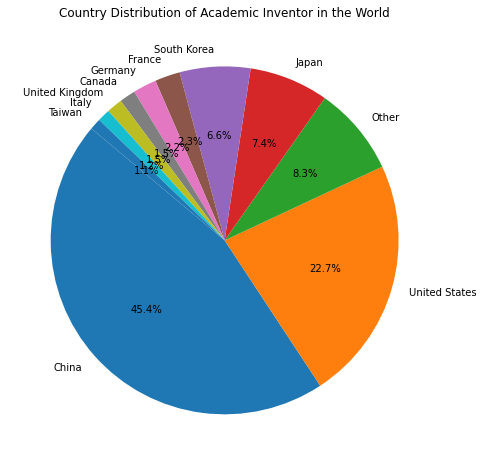

In [260]:
df=df_count_author.copy()
# 计算每个国家的数量
country_counts = df['affiliation_country'].value_counts()

# 将占比小于百分之5的国家合并成一类命名为“其他”
threshold = 0.01
other_countries = country_counts[country_counts / country_counts.sum() < threshold].index
df['affiliation_country'] = df['affiliation_country'].replace(other_countries, 'Other')

# 重新计算每个国家的数量
country_counts = df['affiliation_country'].value_counts()

# 创建扇形图
plt.figure(figsize=(8, 8))
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%', startangle=140)

# 设置图表标题
plt.title("Country Distribution of Academic Inventor in the World")

# 显示图表
plt.show()

In [36]:
df = pd.DataFrame(country_counts)
df = df[df.index!='Other']
# Calculate the percentage and add a new column
df['percentage'] = ((df['affiliation_country'] / df['affiliation_country'].sum()) * 100).round().astype(int)
df['percentage_20'] = (df['percentage'] /4 ).map(lambda x:math.ceil(x)).astype(int)

# Display the updated DataFrame
df


,affiliation_country,percentage,percentage_20
China,48131,49,13
United States,24087,25,7
Japan,7818,8,2
South Korea,6961,7,2
France,2489,3,1
Germany,2317,2,1
Canada,1590,2,1
United Kingdom,1547,2,1
Italy,1246,1,1
Taiwan,1124,1,1


In [37]:
list_df_sample=[]
for sample_nation,sample_num in zip(df.index,df['percentage_20']):
    df_sample=df_count_author[df_count_author['affiliation_country']==sample_nation].sample(n=sample_num,random_state=42)
    list_df_sample.append(df_sample)
df_sample=pd.concat(list_df_sample).reset_index()   
df_sample

,author_id,scopus_matching_name,affiliation_country,count
0,57191834619,"Zhang, Lei",China,2
1,57216528088,"Qing, Peng",China,1
2,57087443900,"Chen, Wei",China,10
3,57818459200,"Wang, Meng",China,1
4,55796463700,"Sun, Yang",China,1
5,57201597662,"Liu, Zhiguo",China,1
6,56185879100,"Huang, Jianfeng",China,1
7,57190442970,"Liu, Sijing",China,5
8,56250014700,"Liang, Zhi",China,2
9,47161257300,"Li, Jian",China,5


In [38]:
df_sample_name=df_match_result_with_address[df_match_result_with_address['author_id'].isin(df_sample['author_id'])]
df_sample_name.to_csv('manual_match/df_sample_name.csv',encoding='utf-8-sig',index=None)
df_sample_name

,labels,author_id,psn_id_matching,psn_id_matching_name,scopus_matching_name,appln_id_matching,eid_matching,doi_matching,title_scopus_matching,title_patstat_matching,...,affilname,invent_0_psn_name_similarity,invent_0_person_address_similarity,person_address_similarity,eid,citedby_count,cited_appln_id,citation_count_5year,coverDate,appln_filing_date
9197,3991,56210513900,11942048,"Hardy, John","Hardy, John",15672923,2-s2.0-0037411512,10.1016/S0197-4580(03)00002-2,Biological markers for therapeutic trials in A...,METHODS OF PROGNOSING THE COURSE AND DEGREE OF...,...,Centers for Disease Control and Prevention,0.181041,0.046987,0.046987,2-s2.0-0037411512,251,15672923,11.0,2003-01-01,1995-07-12 00:00:00
9198,3991,56210513900,11942048,"Hardy, John","Hardy, John",15672923,2-s2.0-77954239263,10.1038/nrd3115,"Biomarkers for alzheimer's disease: Academic, ...",METHODS OF PROGNOSING THE COURSE AND DEGREE OF...,...,Centers for Disease Control and Prevention,0.181041,0.046987,0.046987,2-s2.0-77954239263,527,15672923,11.0,2010-07-01,1995-07-12 00:00:00
9199,3991,56210513900,11942048,"Hardy, John","Hardy, John",15672923,2-s2.0-85106232898,10.1002/alz.12369,Large-scale plasma proteomic profiling identif...,METHODS OF PROGNOSING THE COURSE AND DEGREE OF...,...,Centers for Disease Control and Prevention,0.181041,0.046987,0.046987,2-s2.0-85106232898,22,15672923,11.0,2022-01-01,1995-07-12 00:00:00
9200,3991,56210513900,11942048,"Hardy, John","Hardy, John",15672923,2-s2.0-21644471152,10.1007/s00259-004-1676-9,Is amyloid plaque imaging the key to monitorin...,METHODS OF PROGNOSING THE COURSE AND DEGREE OF...,...,Centers for Disease Control and Prevention,0.181041,0.046987,0.046987,2-s2.0-21644471152,10,15672923,11.0,2004-01-01,1995-07-12 00:00:00
9201,3991,56210513900,11942048,"Hardy, John","Hardy, John",15672923,2-s2.0-85041369180,10.3389/fnagi.2018.00007,An aged canid with behavioral deficits exhibit...,METHODS OF PROGNOSING THE COURSE AND DEGREE OF...,...,Centers for Disease Control and Prevention,0.181041,0.046987,0.046987,2-s2.0-85041369180,11,15672923,11.0,2018-01-30,1995-07-12 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
826529,4690,47161257300,19303990,Li Jian,"Li, Jian",417871971,2-s2.0-84921939013,10.1007/s00374-014-0964-1,Effects of nitrogen and phosphorus addition on...,Analytical method of microbial community struc...,...,Key Laboratory for Forest Ecosystem Process an...,0.255131,-0.106584,-0.106584,2-s2.0-84921939013,163,417871971,1.0,2015-02-01,2014-02-14 00:00:00
826530,4690,47161257300,19303990,Li Jian,"Li, Jian",417871971,2-s2.0-85079553574,10.19675/j.cnki.1006-687x.2018.12015,Relationship between soil nutrient content and...,Analytical method of microbial community struc...,...,Key Laboratory for Forest Ecosystem Process an...,0.255131,-0.106584,-0.106584,2-s2.0-85079553574,1,417871971,1.0,2019-01-01,2014-02-14 00:00:00
826531,4690,47161257300,19303990,Li Jian,"Li, Jian",417871971,2-s2.0-85074650921,10.19675/j.cnki.1006-687x.2018.12003,Utilization of carbon sources by soil microbia...,Analytical method of microbial community struc...,...,Key Laboratory for Forest Ecosystem Process an...,0.255131,-0.106584,-0.106584,2-s2.0-85074650921,1,417871971,1.0,2019-01-01,2014-02-14 00:00:00
826532,4690,47161257300,19303990,Li Jian,"Li, Jian",417871971,2-s2.0-85056833495,10.1016/j.soilbio.2018.11.014,Decoupling of priming and microbial N mining d...,Analytical method of microbial community struc...,...,Key Laboratory for Forest Ecosystem Process an...,0.255131,-0.106584,-0.106584,2-s2.0-85056833495,43,417871971,1.0,2019-02-01,2014-02-14 00:00:00


In [39]:
process=df_sample_name[['author_id','person_id']].merge(df_patstat_author[['appln_id','person_id']],
                                                how='inner',left_on='person_id',right_on='person_id')
process=process.merge(t3[['eid','author_id']], how='inner',left_on='author_id',right_on='author_id')
process=process.drop_duplicates(['appln_id','eid'])
process=process.merge(df_record[['appln_id','title']],how='left',left_on=['appln_id'],right_on=['appln_id'])
process=process.merge(df_record[['eid','title']],how='left',left_on=['eid'],right_on=['eid'])

process=process.rename({'title_x':'title_patent','title_y':'title_paper'},axis=1)
process

,author_id,person_id,appln_id,eid,title_patent,title_paper
0,56210513900,13515611,4626615,2-s2.0-0025033241,METHOD FOR PRODUCING TRANSGENIC ANIMAL MODELS ...,11. Molecular genetics of Alzheimer's disease
1,56210513900,13515611,4626615,2-s2.0-0029686444,METHOD FOR PRODUCING TRANSGENIC ANIMAL MODELS ...,Molecular genetics of Alzheimer's disease
2,56210513900,13515611,4626615,2-s2.0-0028911172,METHOD FOR PRODUCING TRANSGENIC ANIMAL MODELS ...,Microsatellite D21S210 (GT‐12) allele frequenc...
3,56210513900,13515611,4626615,2-s2.0-85089595270,METHOD FOR PRODUCING TRANSGENIC ANIMAL MODELS ...,Community-based genetic study of Parkinson's d...
4,56210513900,13515611,4626615,2-s2.0-0034069848,METHOD FOR PRODUCING TRANSGENIC ANIMAL MODELS ...,Distinctive neuropathology revealed by α-synuc...
...,...,...,...,...,...,...
77063,47161257300,18694801,446400946,2-s2.0-85136569779,Bluetooth air purification device,Comparison on light response curve fitting mod...
77064,47161257300,18694801,446400946,2-s2.0-85056833495,Bluetooth air purification device,Decoupling of priming and microbial N mining d...
77065,47161257300,18694801,446400946,2-s2.0-85083078972,Bluetooth air purification device,Rhizosphere priming effects differ between Nor...
77066,47161257300,18694801,446400946,2-s2.0-85125263233,Bluetooth air purification device,Microbial carbon use efficiency and priming of...


In [40]:
data=list(range(0,len(process)))
chunks = [data[x:x+2650] for x in range(0, len(data), 2650)]

dict_group={}
cnt=0
for i in chunks:
    cnt+=1
    for ii in i:
        dict_group[ii]=cnt
        
process['group']=process.index.map(dict_group)
# process.to_csv('manual_match/process.csv',index=None,encoding='utf-8-sig')
process

,author_id,person_id,appln_id,eid,title_patent,title_paper,group
0,56210513900,13515611,4626615,2-s2.0-0025033241,METHOD FOR PRODUCING TRANSGENIC ANIMAL MODELS ...,11. Molecular genetics of Alzheimer's disease,1
1,56210513900,13515611,4626615,2-s2.0-0029686444,METHOD FOR PRODUCING TRANSGENIC ANIMAL MODELS ...,Molecular genetics of Alzheimer's disease,1
2,56210513900,13515611,4626615,2-s2.0-0028911172,METHOD FOR PRODUCING TRANSGENIC ANIMAL MODELS ...,Microsatellite D21S210 (GT‐12) allele frequenc...,1
3,56210513900,13515611,4626615,2-s2.0-85089595270,METHOD FOR PRODUCING TRANSGENIC ANIMAL MODELS ...,Community-based genetic study of Parkinson's d...,1
4,56210513900,13515611,4626615,2-s2.0-0034069848,METHOD FOR PRODUCING TRANSGENIC ANIMAL MODELS ...,Distinctive neuropathology revealed by α-synuc...,1
...,...,...,...,...,...,...,...
77063,47161257300,18694801,446400946,2-s2.0-85136569779,Bluetooth air purification device,Comparison on light response curve fitting mod...,30
77064,47161257300,18694801,446400946,2-s2.0-85056833495,Bluetooth air purification device,Decoupling of priming and microbial N mining d...,30
77065,47161257300,18694801,446400946,2-s2.0-85083078972,Bluetooth air purification device,Rhizosphere priming effects differ between Nor...,30
77066,47161257300,18694801,446400946,2-s2.0-85125263233,Bluetooth air purification device,Microbial carbon use efficiency and priming of...,30


In [41]:
Counter(process['group'])

Counter({1: 2650,
         2: 2650,
         3: 2650,
         4: 2650,
         5: 2650,
         6: 2650,
         7: 2650,
         8: 2650,
         9: 2650,
         10: 2650,
         11: 2650,
         12: 2650,
         13: 2650,
         14: 2650,
         15: 2650,
         16: 2650,
         17: 2650,
         18: 2650,
         19: 2650,
         20: 2650,
         21: 2650,
         22: 2650,
         23: 2650,
         24: 2650,
         25: 2650,
         26: 2650,
         27: 2650,
         28: 2650,
         29: 2650,
         30: 218})

In [42]:
dfs=[pd.read_excel('./manual_match/output.xlsx',sheet_name='组'+str(i)) for i in range(1,11)]
df_manual=pd.concat(dfs)
for col in df_manual.columns:
    if 'id'  in col:
        df_manual[col]=df_manual[col].astype(str)
df_manual

,author_id,person_id,appln_id,eid,title_patent,title_paper,title_专利,title_纸张,组,判断
0,10639824200,11924922,338942640,2-s2.0-70349201135,PREPARATION METHOD OF HYDROXYAPATITE COATING L...,Mechanical and in vitro biological performance...,使用气溶胶沉积和水热处理制备羟基磷灰石涂层的方法，以及通过该方法制备的纳米结构羟基磷灰石涂层,钛表面气溶胶沉积羟基磷灰石-碳纳米管复合涂层的力学和体外生物学性能,1,1.0
1,10639824200,11924922,338942640,2-s2.0-84878520430,PREPARATION METHOD OF HYDROXYAPATITE COATING L...,New bone formation between bare titanium surfa...,使用气溶胶沉积和水热处理制备羟基磷灰石涂层的方法，以及通过该方法制备的纳米结构羟基磷灰石涂层,在鼻粘膜穿透模型中，通过气溶胶沉积技术在裸钛表面和羟基磷灰石涂层之间形成新骨,1,1.0
2,10639824200,11924922,338942640,2-s2.0-84355166687,PREPARATION METHOD OF HYDROXYAPATITE COATING L...,Hydroxyapatite coating on magnesium with MgF <...,使用气溶胶沉积和水热处理制备羟基磷灰石涂层的方法，以及通过该方法制备的纳米结构羟基磷灰石涂层,镁表面羟基磷灰石涂层与MgF inf 2/inf夹层增强耐蚀性和生物相容性,1,1.0
3,10639824200,11924922,338942640,2-s2.0-80054952377,PREPARATION METHOD OF HYDROXYAPATITE COATING L...,Aerosol deposition of hydroxyapatite and 4-hex...,使用气溶胶沉积和水热处理制备羟基磷灰石涂层的方法，以及通过该方法制备的纳米结构羟基磷灰石涂层,牙科种植体用钛合金表面羟基磷灰石和4-己基间苯二酚涂层的气溶胶沉积,1,1.0
4,10639824200,11924922,338942640,2-s2.0-84909592246,PREPARATION METHOD OF HYDROXYAPATITE COATING L...,Hydroxyapatite and silk combination-coated den...,使用气溶胶沉积和水热处理制备羟基磷灰石涂层的方法，以及通过该方法制备的纳米结构羟基磷灰石涂层,与羟基磷灰石和胶原复合涂层种植体相比，羟基磷灰石和丝绸复合涂层种植体在种植体周围区域具有更好...,1,1.0
...,...,...,...,...,...,...,...,...,...,...
2452,57206711587,4196247,56208493,2-s2.0-0043246566,METHOD FOR DETERMINATION OF MOLECULAR WEIGHT O...,Therapeutic thera-band® exercise on osteoarthr...,透明质酸分子量的测定方法,thera band®运动治疗膝关节骨关节炎-膝关节伸肌和屈肌同时运动的效果-,10,0.0
2453,57206711587,4196247,56208493,2-s2.0-33646848639,METHOD FOR DETERMINATION OF MOLECULAR WEIGHT O...,Identification and functions of chondroitin su...,透明质酸分子量的测定方法,神经干细胞环境中硫酸软骨素的鉴定及其功能,10,0.0
2454,57206711587,4196247,56208493,2-s2.0-84877777506,METHOD FOR DETERMINATION OF MOLECULAR WEIGHT O...,Chondroitinase injection improves keloid patho...,透明质酸分子量的测定方法,软骨素酶注射通过用再生弹性纤维重组细胞外基质来改善瘢痕疙瘩病理,10,0.0
2455,57206711587,4196247,56208493,2-s2.0-84997207402,METHOD FOR DETERMINATION OF MOLECULAR WEIGHT O...,Combined treatment with chondroitinase ABC and...,透明质酸分子量的测定方法,软骨素酶ABC联合跑步机康复治疗成年大鼠慢性重度脊髓损伤,10,0.0


In [43]:
df_sample_name['p_label']=1
df_sample_name

/tmp/ipykernel_30838/3874275974.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sample_name['p_label']=1


,labels,author_id,psn_id_matching,psn_id_matching_name,scopus_matching_name,appln_id_matching,eid_matching,doi_matching,title_scopus_matching,title_patstat_matching,...,invent_0_psn_name_similarity,invent_0_person_address_similarity,person_address_similarity,eid,citedby_count,cited_appln_id,citation_count_5year,coverDate,appln_filing_date,p_label
9197,3991,56210513900,11942048,"Hardy, John","Hardy, John",15672923,2-s2.0-0037411512,10.1016/S0197-4580(03)00002-2,Biological markers for therapeutic trials in A...,METHODS OF PROGNOSING THE COURSE AND DEGREE OF...,...,0.181041,0.046987,0.046987,2-s2.0-0037411512,251,15672923,11.0,2003-01-01,1995-07-12 00:00:00,1
9198,3991,56210513900,11942048,"Hardy, John","Hardy, John",15672923,2-s2.0-77954239263,10.1038/nrd3115,"Biomarkers for alzheimer's disease: Academic, ...",METHODS OF PROGNOSING THE COURSE AND DEGREE OF...,...,0.181041,0.046987,0.046987,2-s2.0-77954239263,527,15672923,11.0,2010-07-01,1995-07-12 00:00:00,1
9199,3991,56210513900,11942048,"Hardy, John","Hardy, John",15672923,2-s2.0-85106232898,10.1002/alz.12369,Large-scale plasma proteomic profiling identif...,METHODS OF PROGNOSING THE COURSE AND DEGREE OF...,...,0.181041,0.046987,0.046987,2-s2.0-85106232898,22,15672923,11.0,2022-01-01,1995-07-12 00:00:00,1
9200,3991,56210513900,11942048,"Hardy, John","Hardy, John",15672923,2-s2.0-21644471152,10.1007/s00259-004-1676-9,Is amyloid plaque imaging the key to monitorin...,METHODS OF PROGNOSING THE COURSE AND DEGREE OF...,...,0.181041,0.046987,0.046987,2-s2.0-21644471152,10,15672923,11.0,2004-01-01,1995-07-12 00:00:00,1
9201,3991,56210513900,11942048,"Hardy, John","Hardy, John",15672923,2-s2.0-85041369180,10.3389/fnagi.2018.00007,An aged canid with behavioral deficits exhibit...,METHODS OF PROGNOSING THE COURSE AND DEGREE OF...,...,0.181041,0.046987,0.046987,2-s2.0-85041369180,11,15672923,11.0,2018-01-30,1995-07-12 00:00:00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
826529,4690,47161257300,19303990,Li Jian,"Li, Jian",417871971,2-s2.0-84921939013,10.1007/s00374-014-0964-1,Effects of nitrogen and phosphorus addition on...,Analytical method of microbial community struc...,...,0.255131,-0.106584,-0.106584,2-s2.0-84921939013,163,417871971,1.0,2015-02-01,2014-02-14 00:00:00,1
826530,4690,47161257300,19303990,Li Jian,"Li, Jian",417871971,2-s2.0-85079553574,10.19675/j.cnki.1006-687x.2018.12015,Relationship between soil nutrient content and...,Analytical method of microbial community struc...,...,0.255131,-0.106584,-0.106584,2-s2.0-85079553574,1,417871971,1.0,2019-01-01,2014-02-14 00:00:00,1
826531,4690,47161257300,19303990,Li Jian,"Li, Jian",417871971,2-s2.0-85074650921,10.19675/j.cnki.1006-687x.2018.12003,Utilization of carbon sources by soil microbia...,Analytical method of microbial community struc...,...,0.255131,-0.106584,-0.106584,2-s2.0-85074650921,1,417871971,1.0,2019-01-01,2014-02-14 00:00:00,1
826532,4690,47161257300,19303990,Li Jian,"Li, Jian",417871971,2-s2.0-85056833495,10.1016/j.soilbio.2018.11.014,Decoupling of priming and microbial N mining d...,Analytical method of microbial community struc...,...,0.255131,-0.106584,-0.106584,2-s2.0-85056833495,43,417871971,1.0,2019-02-01,2014-02-14 00:00:00,1


In [44]:
df_manual.columns

Index(['author_id', 'person_id', 'appln_id', 'eid', 'title_patent',
       'title_paper', 'title_专利', 'title_纸张', '组', '判断'],
      dtype='object')

In [45]:
df_manual=df_manual.merge(df_sample_name[['author_id','person_id','appln_id_matching', 'eid_matching','p_label']],how='left',
                left_on=['author_id', 'person_id', 'appln_id', 'eid'],
               right_on=['author_id','person_id','appln_id_matching', 'eid_matching'],)
df_manual['p_label'].fillna(0,inplace=True)
df_manual['判断'].fillna(0,inplace=True)
df_manual

,author_id,person_id,appln_id,eid,title_patent,title_paper,title_专利,title_纸张,组,判断,appln_id_matching,eid_matching,p_label
0,10639824200,11924922,338942640,2-s2.0-70349201135,PREPARATION METHOD OF HYDROXYAPATITE COATING L...,Mechanical and in vitro biological performance...,使用气溶胶沉积和水热处理制备羟基磷灰石涂层的方法，以及通过该方法制备的纳米结构羟基磷灰石涂层,钛表面气溶胶沉积羟基磷灰石-碳纳米管复合涂层的力学和体外生物学性能,1,1.0,NaN,NaN,0.0
1,10639824200,11924922,338942640,2-s2.0-84878520430,PREPARATION METHOD OF HYDROXYAPATITE COATING L...,New bone formation between bare titanium surfa...,使用气溶胶沉积和水热处理制备羟基磷灰石涂层的方法，以及通过该方法制备的纳米结构羟基磷灰石涂层,在鼻粘膜穿透模型中，通过气溶胶沉积技术在裸钛表面和羟基磷灰石涂层之间形成新骨,1,1.0,NaN,NaN,0.0
2,10639824200,11924922,338942640,2-s2.0-84355166687,PREPARATION METHOD OF HYDROXYAPATITE COATING L...,Hydroxyapatite coating on magnesium with MgF <...,使用气溶胶沉积和水热处理制备羟基磷灰石涂层的方法，以及通过该方法制备的纳米结构羟基磷灰石涂层,镁表面羟基磷灰石涂层与MgF inf 2/inf夹层增强耐蚀性和生物相容性,1,1.0,NaN,NaN,0.0
3,10639824200,11924922,338942640,2-s2.0-80054952377,PREPARATION METHOD OF HYDROXYAPATITE COATING L...,Aerosol deposition of hydroxyapatite and 4-hex...,使用气溶胶沉积和水热处理制备羟基磷灰石涂层的方法，以及通过该方法制备的纳米结构羟基磷灰石涂层,牙科种植体用钛合金表面羟基磷灰石和4-己基间苯二酚涂层的气溶胶沉积,1,1.0,NaN,NaN,0.0
4,10639824200,11924922,338942640,2-s2.0-84909592246,PREPARATION METHOD OF HYDROXYAPATITE COATING L...,Hydroxyapatite and silk combination-coated den...,使用气溶胶沉积和水热处理制备羟基磷灰石涂层的方法，以及通过该方法制备的纳米结构羟基磷灰石涂层,与羟基磷灰石和胶原复合涂层种植体相比，羟基磷灰石和丝绸复合涂层种植体在种植体周围区域具有更好...,1,1.0,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26302,57206711587,4196247,56208493,2-s2.0-0043246566,METHOD FOR DETERMINATION OF MOLECULAR WEIGHT O...,Therapeutic thera-band® exercise on osteoarthr...,透明质酸分子量的测定方法,thera band®运动治疗膝关节骨关节炎-膝关节伸肌和屈肌同时运动的效果-,10,0.0,NaN,NaN,0.0
26303,57206711587,4196247,56208493,2-s2.0-33646848639,METHOD FOR DETERMINATION OF MOLECULAR WEIGHT O...,Identification and functions of chondroitin su...,透明质酸分子量的测定方法,神经干细胞环境中硫酸软骨素的鉴定及其功能,10,0.0,NaN,NaN,0.0
26304,57206711587,4196247,56208493,2-s2.0-84877777506,METHOD FOR DETERMINATION OF MOLECULAR WEIGHT O...,Chondroitinase injection improves keloid patho...,透明质酸分子量的测定方法,软骨素酶注射通过用再生弹性纤维重组细胞外基质来改善瘢痕疙瘩病理,10,0.0,NaN,NaN,0.0
26305,57206711587,4196247,56208493,2-s2.0-84997207402,METHOD FOR DETERMINATION OF MOLECULAR WEIGHT O...,Combined treatment with chondroitinase ABC and...,透明质酸分子量的测定方法,软骨素酶ABC联合跑步机康复治疗成年大鼠慢性重度脊髓损伤,10,0.0,NaN,NaN,0.0


In [47]:
Counter(df_manual['判断'])

Counter({1.0: 985, 0.0: 25322})

In [48]:
# df_manual_new=[df_manual[df_manual['判断']==1]]*20
# df_manual_new.append(df_manual[df_manual['判断']==0])
# df_manual_new=pd.concat(df_manual_new)
df_manual_new=pd.concat([df_manual[df_manual['判断']==1],df_manual[df_manual['判断']==0].sample(n=1000,random_state=42)])
df_manual_new

,author_id,person_id,appln_id,eid,title_patent,title_paper,title_专利,title_纸张,组,判断,appln_id_matching,eid_matching,p_label,simility
0,10639824200,11924922,338942640,2-s2.0-70349201135,PREPARATION METHOD OF HYDROXYAPATITE COATING L...,Mechanical and in vitro biological performance...,使用气溶胶沉积和水热处理制备羟基磷灰石涂层的方法，以及通过该方法制备的纳米结构羟基磷灰石涂层,钛表面气溶胶沉积羟基磷灰石-碳纳米管复合涂层的力学和体外生物学性能,1,1.0,NaN,NaN,0.0,tensor(0.7382)
1,10639824200,11924922,338942640,2-s2.0-84878520430,PREPARATION METHOD OF HYDROXYAPATITE COATING L...,New bone formation between bare titanium surfa...,使用气溶胶沉积和水热处理制备羟基磷灰石涂层的方法，以及通过该方法制备的纳米结构羟基磷灰石涂层,在鼻粘膜穿透模型中，通过气溶胶沉积技术在裸钛表面和羟基磷灰石涂层之间形成新骨,1,1.0,NaN,NaN,0.0,tensor(0.6654)
2,10639824200,11924922,338942640,2-s2.0-84355166687,PREPARATION METHOD OF HYDROXYAPATITE COATING L...,Hydroxyapatite coating on magnesium with MgF <...,使用气溶胶沉积和水热处理制备羟基磷灰石涂层的方法，以及通过该方法制备的纳米结构羟基磷灰石涂层,镁表面羟基磷灰石涂层与MgF inf 2/inf夹层增强耐蚀性和生物相容性,1,1.0,NaN,NaN,0.0,tensor(0.6158)
3,10639824200,11924922,338942640,2-s2.0-80054952377,PREPARATION METHOD OF HYDROXYAPATITE COATING L...,Aerosol deposition of hydroxyapatite and 4-hex...,使用气溶胶沉积和水热处理制备羟基磷灰石涂层的方法，以及通过该方法制备的纳米结构羟基磷灰石涂层,牙科种植体用钛合金表面羟基磷灰石和4-己基间苯二酚涂层的气溶胶沉积,1,1.0,NaN,NaN,0.0,tensor(0.6887)
4,10639824200,11924922,338942640,2-s2.0-84909592246,PREPARATION METHOD OF HYDROXYAPATITE COATING L...,Hydroxyapatite and silk combination-coated den...,使用气溶胶沉积和水热处理制备羟基磷灰石涂层的方法，以及通过该方法制备的纳米结构羟基磷灰石涂层,与羟基磷灰石和胶原复合涂层种植体相比，羟基磷灰石和丝绸复合涂层种植体在种植体周围区域具有更好...,1,1.0,NaN,NaN,0.0,tensor(0.5613)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12904,55991547700,18789939,353308473,2-s2.0-84902546945,Directly-perspective type eye movement detector,The LRP6 rs2302685 polymorphism is associated ...,直接透视式眼动检测器,LRP6 rs2302685多态性与心肌梗死风险增加有关,5,0.0,NaN,NaN,0.0,tensor(-0.0167)
3908,56984590200,18755066,451271880,2-s2.0-58149466432,Electric environment-friendly fingerprint and ...,GC analysis of the fatty acid composition of y...,电动环保指纹和掌纹刷洗成像装置,牦牛肾脂肪酸组成的气相色谱分析,2,0.0,NaN,NaN,0.0,tensor(0.0053)
4573,56984590200,18755066,407640321,2-s2.0-84879479589,Biodegradable Mg-Gd-Zn-Ag-Zr series magnesium ...,Antimutagenic activity and preventive effect o...,可生物降解Mg-Gd-Zn-Ag-Zr系镁合金及其制备方法,红茶对颊粘膜癌的抗突变作用及预防作用,2,0.0,NaN,NaN,0.0,tensor(-0.0328)
7346,56984590200,18755066,421547131,2-s2.0-84872691923,Application of gamma-polyglutamic acid produci...,Cassia tora L. (Jue-ming-zi) has anticancer ac...,γ-聚谷氨酸产生菌及其发酵产物的应用,决明子在体外对TCA8113细胞具有抗癌活性，在体内具有抗转移作用,3,0.0,NaN,NaN,0.0,tensor(0.0278)


In [49]:

df_manual_new.to_csv('manual_match/df_manual_new.csv',encoding='utf-8-sig')
Counter(df_manual_new['判断'])

Counter({1.0: 985, 0.0: 1000})

In [410]:
df_manual_new2['判断'][0]

'1.0'

In [3]:
df_manual_new2 = pd.read_sql(sql='SELECT t.* FROM "df_manual_new2" t', con=connection)
df_manual_new2['判断']=df_manual_new2['判断'].astype(float)
abstract_patent=model.encode(df_manual_new2['appln_abstract'].astype(str).tolist(),show_progress_bar=True)
abstract_paper=model.encode(df_manual_new2['description'].astype(str).tolist(),show_progress_bar=True)
temp=[cos_sim(x,y)[0][0] for x,y in zip(abstract_patent,abstract_paper)]
df_manual_new2['simility_abstract']=temp

title_patent=model.encode(df_manual_new2['title_patent'].astype(str).tolist(),show_progress_bar=True)
title_paper=model.encode(df_manual_new2['title_paper'].astype(str).tolist(),show_progress_bar=True)
temp=[cos_sim(x,y)[0][0] for x,y in zip(title_patent,title_paper)]
df_manual_new2['simility']=temp
df_manual_new2

/tmp/ipykernel_41536/2633371430.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_manual_new2 = pd.read_sql(sql='SELECT t.* FROM "df_manual_new2" t', con=connection)


Batches:   0%|          | 0/63 [00:00<?, ?it/s]

Batches:   0%|          | 0/63 [00:00<?, ?it/s]

Batches:   0%|          | 0/63 [00:00<?, ?it/s]

Batches:   0%|          | 0/63 [00:00<?, ?it/s]

,f1,author_id,person_id,appln_id,eid,title_patent,title_paper,title_专利,title_纸张,组,判断,appln_id_matching,eid_matching,p_label,simility,simility_score,Word_overlap_score,appln_abstract,description,simility_abstract
0,13919,57481109500,19906723,336419740,2-s2.0-85076237059,Rv1793 recombinant protein for serodiagnosis o...,Microfluidic Methods for Fabrication and Engin...,Rv1793重组蛋白在耐药结核病血清学诊断中的应用,用于制造和工程化纳米颗粒药物递送系统的微流体方法,6,1.0,None,None,0.0,tensor(0.0352),1,2,The invention belongs to the technical field o...,Microfluidic technologies with precise fluid c...,tensor(0.0352)
1,11005,36024934800,66950123,488272432,2-s2.0-85096097204,ULTRASOUND GENERATING DEVICE AND METHOD OF FAB...,Origin of Gouy Phase Shift Identified by Laser...,超声波产生装置及其制造方法,激光聚焦超声识别Gouy相移的起源,5,1.0,None,None,0.0,tensor(0.4166),1,2,The present invention relates to an ultrasonic...,"The Gouy phase shift, the phase change of a co...",tensor(0.3530)
2,11063,35378273400,31644868,38021398,2-s2.0-85044045351,TYROSYL tRNA SYNTHETASE MUTANT AND METHOD FOR ...,Genetic Code Expansion of the Silkworm Bombyx ...,酪氨酰-tRNA合成酶突变体及其制备方法,家蚕遗传密码扩展以功能化蚕丝纤维,5,0.0,None,None,0.0,tensor(0.2604),1,1,<P>PROBLEM TO BE SOLVED: To provide tyrosyl tR...,The genetic code in bacteria and animal cells ...,tensor(0.5077)
3,11064,35378273400,31644868,38021398,2-s2.0-85052388397,TYROSYL tRNA SYNTHETASE MUTANT AND METHOD FOR ...,Engineering an Automaturing Transglutaminase w...,酪氨酰-tRNA合成酶突变体及其制备方法,通过两个密码子重新分配的遗传密码扩展，设计出具有增强热稳定性的自动转谷氨酰胺酶,5,1.0,None,None,0.0,tensor(0.4680),1,0,<P>PROBLEM TO BE SOLVED: To provide tyrosyl tR...,"In the present study, we simultaneously incorp...",tensor(0.4418)
4,24,10639824200,33357427,331446014,2-s2.0-70349201135,Preparation method of hydroxyapatite-chitosan ...,Mechanical and in vitro biological performance...,气溶胶沉积法制备羟基磷灰石-壳聚糖复合涂层及生物活性增强的羟基磷灰石-壳聚糖复合涂层,钛表面气溶胶沉积羟基磷灰石-碳纳米管复合涂层的力学和体外生物学性能,1,1.0,None,None,0.0,tensor(0.6928),1,8,PURPOSE: A preparation method of a hydroxyapat...,Hydroxyapatite (HA)-carbon nanotube (CNT) comp...,tensor(0.4410)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1980,24902,35727384600,43445109,416812799,2-s2.0-84925221860,Application of molecular marker in diagnosing ...,None,分子标记物在甲状旁腺肿瘤诊断中的应用,None,10,0.0,None,None,0.0,tensor(-0.0438),1,0,The invention relates to application of a mole...,OBJECTIVE: To find the potential serum specifi...,tensor(0.1439)
1981,25501,35727384600,43445109,423531280,2-s2.0-84908020695,Uses of CHIP protein in pancreas cancer early ...,None,CHIP蛋白在胰腺癌早期诊断及预后判断中的应用,None,10,0.0,None,None,0.0,tensor(-0.0194),1,0,The invention relates to uses of a CHIP protei...,OBJECTIVE: To compare the two different nutrit...,tensor(0.3647)
1982,25504,35727384600,43445109,423531280,2-s2.0-85016398327,Uses of CHIP protein in pancreas cancer early ...,Surgical treatment of pancreatic carcinoma: pr...,CHIP蛋白在胰腺癌早期诊断及预后判断中的应用,胰腺癌的外科治疗：问题和最新进展,10,1.0,None,None,0.0,tensor(0.4786),1,2,The invention relates to uses of a CHIP protei...,Nowadays surgical technologies develop fast un...,tensor(0.3534)
1983,24607,35727384600,43445109,409861714,2-s2.0-85016398327,Application of fibroblast activation protein (...,Surgical treatment of pancreatic carcinoma: pr...,成纤维细胞活化蛋白（FAP）α在胰腺癌预后试剂盒制备中的应用,胰腺癌的外科治疗：问题和最新进展,10,1.0,None,None,0.0,tensor(0.5351),1,3,The invention relates to an application of fib...,Nowadays surgical technologies develop fast un...,tensor(0.4789)


In [7]:
def Word_overlap_score(x, y):
    # Add a check to ensure x and y are strings
    if not isinstance(x, str) or not isinstance(y, str):
        return 0  # or any other value that makes sense in your context

    token_x = [stemmer.stem(token) for token in word_tokenize(x)]
    token_y = [stemmer.stem(token) for token in word_tokenize(y)]
    return len([i for i in token_x if i in token_y])

# Assuming df_manual_new is your DataFrame
# df_manual_new['Word_overlap_score'] = df_manual_new.apply(lambda row: Word_overlap_score(row['title_patent'], row['title_paper']), axis=1)
df_manual_new2['Word_overlap_score'] = df_manual_new2.apply(lambda row: Word_overlap_score(row['title_patent'], row['title_paper']), axis=1)
df_manual_new2['Word_overlap_score_abs'] = df_manual_new2.apply(lambda row: Word_overlap_score(row['appln_abstract'], row['description']), axis=1)
# df_manual['Word_overlap_score'] = df_manual.apply(lambda row: Word_overlap_score(row['title_patent'], row['title_paper']), axis=1)


阈值： 0.549883997325564
阈值： 0.36969146075447784
阈值： 0.44702149659907925
阈值： 0.481188867204622
阈值： 0.5213402455879239


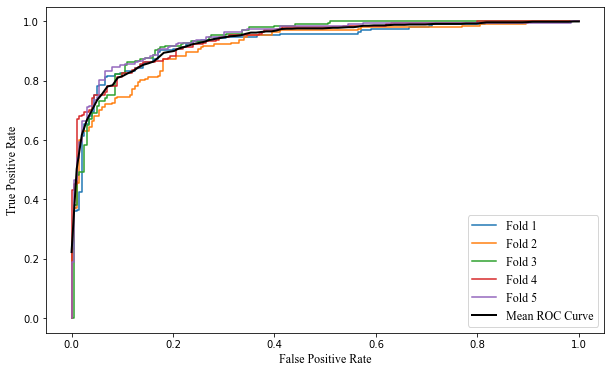

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score
from matplotlib.font_manager import FontProperties

# Assuming 'Word_overlap_score', 'simility', and '判断' columns already exist in df_manual_new

# Selecting features
X = df_manual_new2[['Word_overlap_score', 'simility','simility_abstract']]

# Selecting target variable
y = df_manual_new2['判断']

# Initializing the logistic regression model
Logistic_model = LogisticRegression()

# Using StratifiedKFold for five-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Storing true positive rate (tpr) and false positive rate (fpr) for each fold
tpr_list = []
fpr_list = []
thresholds_list=[]
# Storing performance metrics for each iteration
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Plotting ROC curve for each fold
plt.figure(figsize=(10, 6))

# Set font file path
font_path = '/data/wangyuhang/ttf/Times New Roman.ttf'
font = FontProperties(fname=font_path, size=12)
cnt=1
for i, (train_index, test_index) in enumerate(cv.split(X, y)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    Logistic_model.fit(X_train, y_train)
    # 保存模型到文件
    with open('model/model_{}'.format(str(cnt)), 'wb') as file:
        pickle.dump(Logistic_model, file)
    cnt+=1
    y_scores = Logistic_model.predict_proba(X_test)[:, 1]
#     y_pred = Logistic_model.predict(X_test)

    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    tpr_list.append(tpr)
    fpr_list.append(fpr)
    thresholds_list.append(thresholds)
    plt.plot(fpr, tpr, label=f'Fold {i + 1}')
    
    # 使用不同的阈值进行预测
    threshold = thresholds[np.argmax(tpr - fpr)]  # 请根据实际情况调整阈值
    print('阈值：',threshold)
    y_pred = (Logistic_model.predict_proba(X_test)[:, 1] > threshold).astype(int)
#     y_pred = Logistic_model.predict(X_test)

    # Calculating performance metrics
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))
    
# Calculate mean tpr and fpr
mean_tpr = np.mean([np.interp(np.linspace(0, 1, 100), fpr, tpr) for fpr, tpr in zip(fpr_list, tpr_list)], axis=0)

# Plotting mean ROC curve
plt.plot(np.linspace(0, 1, 100), mean_tpr, label='Mean ROC Curve', linewidth=2, color='black')

plt.xlabel('False Positive Rate', fontproperties=font)
plt.ylabel('True Positive Rate', fontproperties=font)
# plt.title('ROC Curve for Each Fold and Mean ROC Curve', fontproperties=font)
plt.legend(prop=font)
plt.savefig('image/ROC Curve.png', format='png', bbox_inches='tight')

plt.show()


In [23]:
# fine_batch=4
# thresholds_list[fine_batch][np.argmax(tpr_list[fine_batch] - fpr_list[fine_batch])]

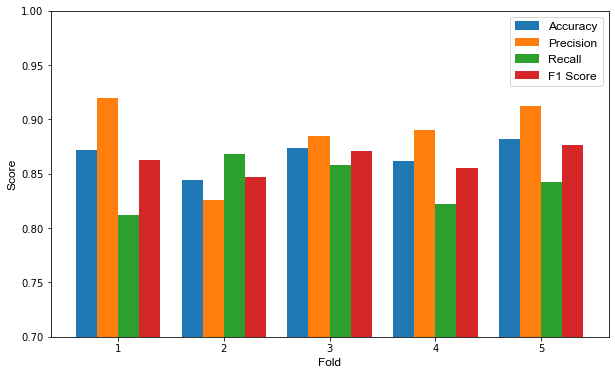

In [37]:
# Correcting the length of scores for plotting
min_length = min(len(accuracy_scores), len(precision_scores), len(recall_scores), len(f1_scores))

# Set font file path
font_path = '/data/wangyuhang/ttf/Times New Roman.ttf'
font_path = '/data/wangyuhang/ttf/ARIAL.TTF'

font = FontProperties(fname=font_path, size=12)

# Plotting all four metrics on a grouped bar chart
x = np.arange(1, min_length + 1)
width = 0.2

plt.figure(figsize=(10, 6))

plt.bar(x - 1.5 * width, accuracy_scores[:min_length], width=width, label='Accuracy')
plt.bar(x - 0.5 * width, precision_scores[:min_length], width=width, label='Precision')
plt.bar(x + 0.5 * width, recall_scores[:min_length], width=width, label='Recall')
plt.bar(x + 1.5 * width, f1_scores[:min_length], width=width, label='F1 Score')

plt.xlabel('Fold', fontproperties=font)
plt.ylabel('Score', fontproperties=font)

# Set y-axis limit to start from 0.6
plt.ylim(0.7, 1.0)

# Set legend font
plt.legend(prop=font, loc='upper right')

# Save the figure
plt.savefig('image/Cross-Validation_Performance_Metrics.png', format='png', bbox_inches='tight')

plt.show()


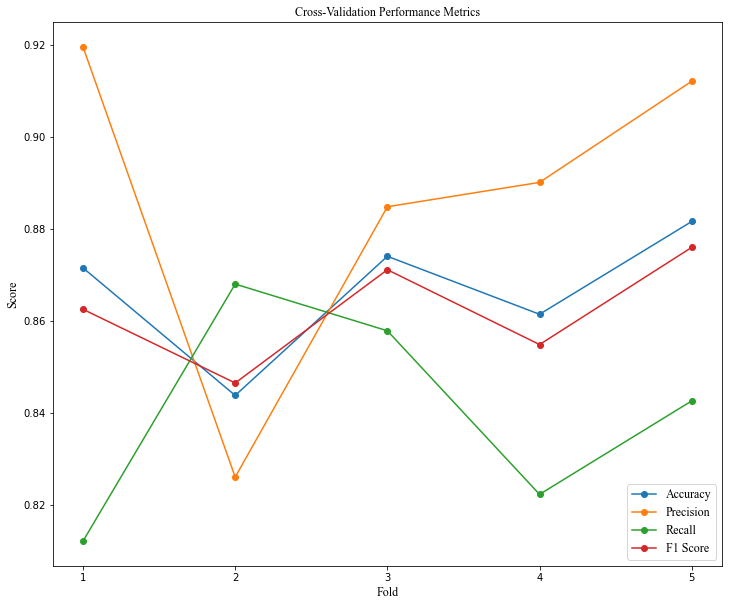

In [17]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import numpy as np

# Correcting the length of scores for plotting
min_length = min(len(accuracy_scores), len(precision_scores), len(recall_scores), len(f1_scores))

# Set font file path
font_path = '/data/wangyuhang/ttf/Times New Roman.ttf'
font = FontProperties(fname=font_path, size=12)

# Plotting all four metrics on a single line chart
x = np.arange(1, min_length + 1)

plt.figure(figsize=(12, 10))

plt.plot(x, accuracy_scores[:min_length], marker='o', label='Accuracy')
plt.plot(x, precision_scores[:min_length], marker='o', label='Precision')
plt.plot(x, recall_scores[:min_length], marker='o', label='Recall')
plt.plot(x, f1_scores[:min_length], marker='o', label='F1 Score')

plt.xlabel('Fold', fontproperties=font)
plt.ylabel('Score', fontproperties=font)
plt.title('Cross-Validation Performance Metrics', fontproperties=font)
plt.xticks(x)  # Set x-axis ticks to be integers 1, 2, 3, 4, 5
plt.legend(prop=font)  # Set legend font

plt.show()


In [516]:
df_metrics=pd.DataFrame([precision_scores,recall_scores,f1_scores,accuracy_scores],
             index=['precision_scores','recall_scores','f1_scores','accuracy_scores']).T
df_metrics.to_csv('/data/wangyuhang/inspire/image/df_metrics.csv',encoding='utf-8-sig')
df_metrics

,precision_scores,recall_scores,f1_scores,accuracy_scores
0,0.919540,0.812183,0.862534,0.871537
1,0.826087,0.868020,0.846535,0.843829
2,0.884817,0.857868,0.871134,0.874055
3,0.890110,0.822335,0.854881,0.861461
4,0.912088,0.842640,0.875989,0.881612


In [497]:
# import matplotlib.pyplot as plt
# import numpy as np
# from sklearn.model_selection import StratifiedKFold
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score
# from matplotlib.font_manager import FontProperties

# # Assuming 'Word_overlap_score', 'simility', and '判断' columns already exist in df_manual_new

# # Selecting features
# X = df_manual[['Word_overlap_score', 'simility']]

# # Selecting target variable
# y = df_manual['判断']

# # Initializing the logistic regression model
# model = LogisticRegression()

# # Using StratifiedKFold for five-fold cross-validation
# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# # Storing true positive rate (tpr) and false positive rate (fpr) for each fold
# tpr_list = []
# fpr_list = []

# # Storing performance metrics for each iteration
# accuracy_scores = []
# precision_scores = []
# recall_scores = []
# f1_scores = []

# # Plotting ROC curve for each fold
# plt.figure(figsize=(10, 6))

# # Set font file path
# font_path = '/data/wangyuhang/ttf/Times New Roman.ttf'
# font = FontProperties(fname=font_path, size=12)
# cnt=1
# for i, (train_index, test_index) in enumerate(cv.split(X, y)):
#     X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#     y_train, y_test = y.iloc[train_index], y.iloc[test_index]

#     model.fit(X_train, y_train)
#     # 保存模型到文件
# #     with open('model/model_{}'.format(str(cnt)), 'wb') as file:
# #         pickle.dump(model, file)
#     cnt+=1
#     y_scores = model.predict_proba(X_test)[:, 1]
#     y_pred = model.predict(X_test)

#     # Calculating performance metrics
#     accuracy_scores.append(accuracy_score(y_test, y_pred))
#     precision_scores.append(precision_score(y_test, y_pred))
#     recall_scores.append(recall_score(y_test, y_pred))
#     f1_scores.append(f1_score(y_test, y_pred))
    
#     fpr, tpr, _ = roc_curve(y_test, y_scores)
#     tpr_list.append(tpr)
#     fpr_list.append(fpr)

#     plt.plot(fpr, tpr, label=f'Fold {i + 1}')

# # Calculate mean tpr and fpr
# mean_tpr = np.mean([np.interp(np.linspace(0, 1, 100), fpr, tpr) for fpr, tpr in zip(fpr_list, tpr_list)], axis=0)

# # Plotting mean ROC curve
# plt.plot(np.linspace(0, 1, 100), mean_tpr, label='Mean ROC Curve', linewidth=2, color='black')

# plt.xlabel('False Positive Rate', fontproperties=font)
# plt.ylabel('True Positive Rate', fontproperties=font)
# plt.title('ROC Curve for Each Fold and Mean ROC Curve', fontproperties=font)
# plt.legend(prop=font)
# plt.show()


In [498]:
# import matplotlib.pyplot as plt
# from matplotlib.font_manager import FontProperties
# import numpy as np

# # Correcting the length of scores for plotting
# min_length = min(len(accuracy_scores), len(precision_scores), len(recall_scores), len(f1_scores))

# # Set font file path
# font_path = '/data/wangyuhang/ttf/Times New Roman.ttf'
# font = FontProperties(fname=font_path, size=12)

# # Plotting all four metrics on a single line chart
# x = np.arange(1, min_length + 1)

# plt.figure(figsize=(12, 10))

# plt.plot(x, accuracy_scores[:min_length], marker='o', label='Accuracy')
# plt.plot(x, precision_scores[:min_length], marker='o', label='Precision')
# plt.plot(x, recall_scores[:min_length], marker='o', label='Recall')
# plt.plot(x, f1_scores[:min_length], marker='o', label='F1 Score')

# plt.xlabel('Fold', fontproperties=font)
# plt.ylabel('Score', fontproperties=font)
# plt.title('Cross-Validation Performance Metrics', fontproperties=font)
# plt.xticks(x)  # Set x-axis ticks to be integers 1, 2, 3, 4, 5
# plt.legend(prop=font)  # Set legend font

# plt.show()


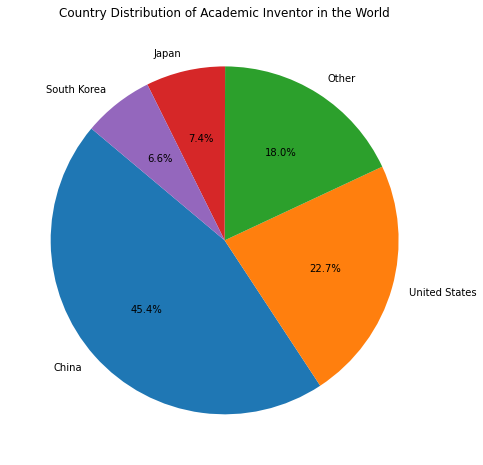

In [443]:
df=df_count_author.copy()
# 计算每个国家的数量
country_counts = df['affiliation_country'].value_counts()

# 将占比小于百分之5的国家合并成一类命名为“其他”
threshold = 0.05
other_countries = country_counts[country_counts / country_counts.sum() < threshold].index
df['affiliation_country'] = df['affiliation_country'].replace(other_countries, 'Other')

# 重新计算每个国家的数量
country_counts = df['affiliation_country'].value_counts()

# 创建扇形图
plt.figure(figsize=(8, 8))
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%', startangle=140)

# 设置图表标题
plt.title("Country Distribution of Academic Inventor in the World")

# 显示图表
plt.show()

/tmp/ipykernel_30838/3174617027.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['affiliation_country'] = df['affiliation_country'].replace(other_countries, 'Other')


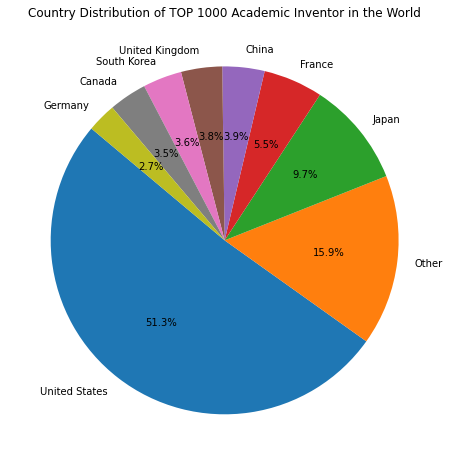

In [444]:
df=df_count_author[0:1000]
# 计算每个国家的数量
country_counts = df['affiliation_country'].value_counts()

# 将占比小于百分之5的国家合并成一类命名为“其他”
threshold = 0.02
other_countries = country_counts[country_counts / country_counts.sum() < threshold].index
df['affiliation_country'] = df['affiliation_country'].replace(other_countries, 'Other')

# 重新计算每个国家的数量
country_counts = df['affiliation_country'].value_counts()

# 创建扇形图
plt.figure(figsize=(8, 8))
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%', startangle=140)

# 设置图表标题
plt.title("Country Distribution of TOP 1000 Academic Inventor in the World")

# 显示图表
plt.show()

# 形成完整数据集

In [445]:
len(df_record['title_embedding'][0])

384

In [57]:
# df_ppp=df_match_result_with_address[['author_id','person_id']].drop_duplicates()
# df_ppp=df_ppp.merge(df_patstat_author[['appln_id','person_id']], how='inner',left_on='person_id',right_on='person_id')
# df_ppp=df_ppp.merge(t3[['eid','author_id']], how='inner',left_on='author_id',right_on='author_id')
# df_ppp=df_ppp.drop_duplicates(['appln_id','eid'])
# df_ppp=df_ppp.merge(df_record[['appln_id','title','title_embedding']],how='left',left_on=['appln_id'],right_on=['appln_id'])
# df_ppp=df_ppp.merge(df_record[['eid','title','title_embedding']],how='left',left_on=['eid'],right_on=['eid'])

# df_ppp=df_ppp.rename({'title_x':'title_patent','title_y':'title_paper',
#                       'title_embedding_x':'title_patent_embedding','title_embedding_y':'title_paper_embedding'},axis=1)
# df_ppp=df_ppp[df_ppp['title_paper'].notnull()]

# # 假设 original_df 是你的原始 DataFrame
# # 按行拆分的大小（每个小DataFrame的行数）
# chunk_size = 1000

# # 获取原始DataFrame的行数
# total_rows = len(df_ppp)

# # 计算要拆分的小DataFrame的数量
# num_chunks = (total_rows // chunk_size) + 1

# # 拆分DataFrame为小DataFrame列表
# small_dfs = [df_ppp.iloc[i * chunk_size:(i + 1) * chunk_size] for i in range(num_chunks)]

# # small_dfs 现在包含了原始DataFrame拆分后的多个小DataFrame
# pd.options.mode.chained_assignment = None  # 禁用警告
# for df_item in tqdm(small_dfs):
#     temp=[cos_sim(x,y)[0][0] for x,y in zip(df_item['title_patent_embedding'],df_item['title_paper_embedding'])]
#     df_item['simility']=temp
#     df_item=df_item[df_item['simility']>0.2]

# df_ppp=pd.concat(small_dfs)
# df_ppp=df_ppp[df_ppp['simility']>0.2]
# del df_ppp['title_patent_embedding']
# del df_ppp['title_paper_embedding']
# df_ppp.to_pickle('data/version/version_v1/df_ppp.pickle')

# df_ppp

In [281]:
filiting_appln=df_record[(df_record['appln_filing_year']<2016)&(df_record['appln_filing_year']>=1980)]['appln_id'].unique()
filiting_appln

array(['6675034', '15463575', '17206714', ..., '573928920', '573929213',
       '573883911'], dtype=object)

In [461]:
df_paper=t3[t3['author_id'].isin(df_match_result_with_address['author_id'])].merge(df_record[['appln_id', 'title', 'eid', 'doi', 'source_id',
       'labels', 'coverDate', 'afid', 'affilname', 'affiliation_city', 'affiliation_country', 'author_count', 'author_names', 
        'author_ids', 'author_afids', 'openaccess',  'freetoread', 'freetoreadLabel', 'fund_acr', 'fund_no', 'fund_sponsor','citedby_count']],left_on='eid',right_on='eid')
df_paper['coverDate_year']=df_paper['coverDate'].apply(lambda x:x.year)
df_paper

,author_idx,author_id,author_name,eid,appln_id,title,doi,source_id,labels,coverDate,...,author_ids,author_afids,openaccess,freetoread,freetoreadLabel,fund_acr,fund_no,fund_sponsor,citedby_count,coverDate_year
0,3,6603605218,"Meksem, K.",2-s2.0-85009896689,NaN,Quantitative trait loci underlying resistance ...,10.1007/s13205-014-0211-3,2.110045e+10,-1,2015-04-01,...,57212280404;56585965100;7102487835;6603605218;...,60029472;60005579;60005579;60029472;60029472,1,repositoryvor,Green,DOD,W911NF-11-1-0178,U.S. Department of Defense,15.0,2015
1,5,55328930900,"Gupta, Naveen",2-s2.0-85008864359,NaN,An extracellular thermo-alkali-stable laccase ...,10.1007/s13205-014-0207-z,2.110045e+10,-1,2015-04-01,...,55945540100;7403232077;55945117600;54951275500...,60018526;60018526;60018526;60018526;100346988;...,1,repositoryvor,Green,None,undefined,None,100.0,2015
2,4,55740777400,"Jung, Jin Young",2-s2.0-85015302975,NaN,Evaluation of orange peel for biosurfactant pr...,10.1007/s13205-015-0362-x,2.110045e+10,4663,2016-12-01,...,56196285400;56189498800;56231425100;5817095530...,60008424-60001170;60008424;60008424-60199632;6...,1,repositoryvor,Green,None,undefined,None,54.0,2016
3,3,8277688900,"Han, Jeung Sul",2-s2.0-85017423684,NaN,MYB transcription factor isolated from Raphanu...,10.1007/s13205-016-0396-8,2.110045e+10,-1,2016-12-01,...,57193900033;37112768100;7404081419;8277688900;...,60012704;60012704;60068698;60012704;60012704,1,repositoryvor,Green,KNU,undefined,Kyungpook National University,5.0,2016
4,0,36775154800,"Padmanabhan, Sasisanker",2-s2.0-85017416810,NaN,Delignification of miscanthus using ethylenedi...,10.1007/s13205-015-0344-z,2.110045e+10,-1,2016-12-01,...,36775154800;55521206300;35849122600;3666144140...,60025038-114590151;60025038;60025038;60025038;...,1,repositoryvor,Green,UCB,undefined,University of California Berkeley,11.0,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798115,1,57205313732,"Lee, Seung Eun",2-s2.0-85129295753,NaN,Comparison of three antioxidants in chemical a...,10.1017/S0967199421000459,1.907300e+04,-1,2022-01-01,...,57210469630;57205313732;57210466436;5721046319...,60117634;60117634;60117634;60117634;60117634;6...,0,None,None,MAFRA,undefined,"Ministry of Agriculture, Food and Rural Affairs",2.0,2022
4798116,8,56296323900,"Kim, Eun Young",2-s2.0-85129295753,NaN,Comparison of three antioxidants in chemical a...,10.1017/S0967199421000459,1.907300e+04,-1,2022-01-01,...,57210469630;57205313732;57210466436;5721046319...,60117634;60117634;60117634;60117634;60117634;6...,0,None,None,MAFRA,undefined,"Ministry of Agriculture, Food and Rural Affairs",2.0,2022
4798117,9,26021408600,"Park, Se Pill",2-s2.0-85129295753,NaN,Comparison of three antioxidants in chemical a...,10.1017/S0967199421000459,1.907300e+04,-1,2022-01-01,...,57210469630;57205313732;57210466436;5721046319...,60117634;60117634;60117634;60117634;60117634;6...,0,None,None,MAFRA,undefined,"Ministry of Agriculture, Food and Rural Affairs",2.0,2022
4798118,1,57199160334,"Li, Ming",2-s2.0-85128146377,NaN,PTEN expression in human cumulus cells is asso...,10.1017/S096719942200003X,1.907300e+04,3368,2022-01-01,...,56965937800;57199160334;57574494100;5719241089...,114105372-60005206;60017060;114105372;60122372...,0,None,None,NSFC,2019-ZQN-91,National Natural Science Foundation of China,0.0,2022


In [462]:
df_patent=df_patstat_author[df_patstat_author['person_id'].isin(df_match_result_with_address['person_id'])].merge(df_record[['appln_id', 'title', 'eid', 'doi', 'source_id',
       'labels', 'appln_auth', 'appln_nr', 'appln_kind', 'appln_filing_date', 'appln_filing_year', 'appln_nr_original', 'ipr_type', 'receiving_office', 'internat_appln_id', 'int_phase', 'reg_phase',
       'nat_phase', 'earliest_filing_date', 'earliest_filing_year', 'earliest_filing_id', 'earliest_publn_date', 'earliest_publn_year',
       'earliest_pat_publn_id', 'granted', 'docdb_family_id', 'inpadoc_family_id', 'docdb_family_size', 'nb_citing_docdb_fam',
       'nb_applicants', 'nb_inventors', 'citedby_count', 'cited_appln_id', 'citation_count_5year']],left_on='appln_id',right_on='appln_id')
df_patent=df_patent[df_patent['appln_id'].isin(filiting_appln)]
df_patent

,appln_id,person_id,invt_seq_nr,psn_name,psn_id,psn_sector,person_address,title,eid,doi,...,granted,docdb_family_id,inpadoc_family_id,docdb_family_size,nb_citing_docdb_fam,nb_applicants,nb_inventors,citedby_count,cited_appln_id,citation_count_5year
0,416543665,239,4.0,"SAKAS, GEORGIOS",28185050,None,"Herdweg 81,64285 Darmstadt",Apparatus and method for ultrasound image acqu...,NaN,NaN,...,Y,50424058.0,416543665.0,2.0,6.0,2.0,4.0,NaN,416543665,2.0
1,416543665,47124650,1.0,"FORZONI, LEONARDO",9059383,None,"Via Bure Vecchia Sud 11,I-51100 Pistoia",Apparatus and method for ultrasound image acqu...,NaN,NaN,...,Y,50424058.0,416543665.0,2.0,6.0,2.0,4.0,NaN,416543665,2.0
2,25,114,2.0,"LI, XIAODONG",19358188,None,"Apt. 3, 3435 Waco Street,San Diego, CA 92117",T1R TASTE RECEPTORS AND GENES ENCODING SAME,NaN,NaN,...,Y,26947173.0,25.0,37.0,78.0,1.0,5.0,NaN,NaN,0.0
3,25,117,5.0,"ZOZULYA, SERGEY",37553049,None,"14481 Yazoo Street,San Diego, CA 92129",T1R TASTE RECEPTORS AND GENES ENCODING SAME,NaN,NaN,...,Y,26947173.0,25.0,37.0,78.0,1.0,5.0,NaN,NaN,0.0
4,25,115,3.0,"STASZEWSKI, LENA",30934537,None,"8270 Calle Nueva,San Diego, CA 92126",T1R TASTE RECEPTORS AND GENES ENCODING SAME,NaN,NaN,...,Y,26947173.0,25.0,37.0,78.0,1.0,5.0,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737660,482247140,69425491,6.0,XU JIE,35924369,INDIVIDUAL,None,Intervention type ultrasonic imaging system wi...,NaN,NaN,...,Y,59459398.0,482247140.0,1.0,1.0,1.0,6.0,NaN,482247140,1.0
737710,40228180,72019602,2.0,"CHOI, KANG JU",5040299,None,None,METHOD FOR PRODUCING GINSENOSIDE RG1,NaN,NaN,...,Y,19568950.0,40228180.0,1.0,1.0,1.0,4.0,NaN,NaN,0.0
737711,40330252,72715392,1.0,LADAK HANIF M.,18509323,None,None,2 3 PROSTATE BOUNDARY SEGMENTATION FROM 2D AND...,NaN,NaN,...,N,23474607.0,984262.0,8.0,51.0,1.0,4.0,NaN,NaN,0.0
737714,40542850,73249466,4.0,"KANG, TAE CHEON",16310666,None,None,Anticonvulsant containing imperatorin and/or f...,NaN,NaN,...,Y,37334174.0,40542850.0,1.0,2.0,2.0,8.0,NaN,NaN,0.0


In [464]:
df_paper[['eid']].to_csv('manual_match/df_paper_eid.csv',encoding='utf-8-sig')
df_patent[['appln_id']].to_csv('manual_match/df_patent_appln_id.csv',encoding='utf-8-sig')

In [478]:
df_paper_eid_abs = pd.read_sql(sql='SELECT t.* FROM "df_paper_eid_abs" t', con=connection)
df_paper_eid_abs=df_paper_eid_abs.drop_duplicates('eid')
df_paper_eid_abs

,eid,description
0,2-s2.0-85009896689,The best way to protect yield loss of soybean ...
1,2-s2.0-85008864359,Degradation of residual lignin in kraft pulp b...
2,2-s2.0-85015302975,A Gram-positive bacterium was isolated from ma...
3,2-s2.0-85017423684,"A MYB transcription factor gene, RsMYB1, from ..."
4,2-s2.0-85017416810,Pretreatment of miscanthus is essential for ef...
...,...,...
4798110,2-s2.0-85125791972,Mammal sex determination depends on whether th...
4798112,2-s2.0-85125769983,To explore whether embryo culture with melaton...
4798115,2-s2.0-85129295753,Summary Our previous studies have already reve...
4798118,2-s2.0-85128146377,Summary Embryo quality determines the success ...


In [475]:
df_patent_appln_id_abs = pd.read_sql(sql='SELECT t.* FROM "df_patent_appln_id_abs" t', con=connection)
df_patent_appln_id_abs=df_patent_appln_id_abs.drop_duplicates('appln_id')
df_patent_appln_id_abs

,appln_id,appln_abstract
0,4592011,The present invention relates to a polypeptide...
1,15567268,1. An isolated sequence of the DNA molecule wh...
3,17060288,Lactic acid bacteria of the genus Lactobacillu...
4,17197663,"Methods and compositions for the prevention, t..."
5,29350367,PURPOSE:To obtain a new antibiotic substance P...
...,...,...
323772,567035745,The invention relates to antibody-drug conjuga...
323774,568921703,Provided are sustained release medicaments for...
323775,571630635,The present disclosure relates to a protocol f...
323778,571631449,Disclosed are compounds of Formula (I): or a s...


In [469]:
# print('author_id number--',len(df_ppp['author_id'].unique()))
# print('person_id number--',len(df_ppp['person_id'].unique()))
# print('appln_id number--',len(df_ppp['appln_id'].unique()))
print('total appln_id number--',len(df_patent['appln_id'].unique()))
# print('eid number--',len(df_ppp['eid'].unique()))
print('total eid number--',len(df_paper['eid'].unique()))
print('paper-patent pair number--',len(df_ppp.drop_duplicates(['appln_id','eid'])))


author_id number-- 58813
person_id number-- 68532
appln_id number-- 168940
total appln_id number-- 211123
eid number-- 1941379
total eid number-- 3270371
paper-patent pair number-- 9766990


In [482]:
df_ppp=df_match_result_with_address[['author_id','person_id']].drop_duplicates()
df_ppp=df_ppp.merge(df_patstat_author[['appln_id','person_id']], how='inner',left_on='person_id',right_on='person_id')
df_ppp=df_ppp.merge(t3[['eid','author_id']], how='inner',left_on='author_id',right_on='author_id')
df_ppp=df_ppp.drop_duplicates(['appln_id','eid'])
df_ppp=df_ppp.merge(df_record[['appln_id','title','title_embedding']],how='left',left_on=['appln_id'],right_on=['appln_id'])
df_ppp=df_ppp.merge(df_record[['eid','title','title_embedding']],how='left',left_on=['eid'],right_on=['eid'])

df_ppp=df_ppp.rename({'title_x':'title_patent','title_y':'title_paper',
                      'title_embedding_x':'title_patent_embedding','title_embedding_y':'title_paper_embedding'},axis=1)
df_ppp=df_ppp[df_ppp['title_paper'].notnull()]

# 假设 original_df 是你的原始 DataFrame
# 按行拆分的大小（每个小DataFrame的行数）
chunk_size = 10000

# 获取原始DataFrame的行数
total_rows = len(df_ppp)

# 计算要拆分的小DataFrame的数量
num_chunks = (total_rows // chunk_size) + 1

# 拆分DataFrame为小DataFrame列表
small_dfs = [df_ppp.iloc[i * chunk_size:(i + 1) * chunk_size] for i in range(num_chunks)]

# # small_dfs 现在包含了原始DataFrame拆分后的多个小DataFrame
# pd.options.mode.chained_assignment = None  # 禁用警告
# for df_item in tqdm(small_dfs):
#     temp=[cos_sim(x,y)[0][0] for x,y in zip(df_item['title_patent_embedding'],df_item['title_paper_embedding'])]
#     df_item['simility']=temp
#     df_item=df_item[df_item['simility']>0.2]

# df_ppp=pd.concat(small_dfs)
# df_ppp=df_ppp[df_ppp['simility']>0.2]
# del df_ppp['title_patent_embedding']
# del df_ppp['title_paper_embedding']
# df_ppp.to_pickle('data/version/version_v1/df_ppp.pickle')

# df_ppp

In [512]:
df_ppp.to_pickle('version_3/df_ppp.pickle')
df_paper.to_pickle('version_3/df_paper.pickle')
df_patent.to_pickle('version_3/df_patent.pickle')


In [35]:
# final_dfs=[]
# # small_dfs 现在包含了原始DataFrame拆分后的多个小DataFrame
# pd.options.mode.chained_assignment = None  # 禁用警告
# threshold=0.5213402455879239
# for df_item in tqdm(small_dfs):
#     temp=[cos_sim(x,y)[0][0] for x,y in zip(df_item['title_patent_embedding'],df_item['title_paper_embedding'])]
#     df_item['simility']=temp
#     df_item=df_item.merge(df_paper_eid_abs,left_on='eid',right_on='eid')
#     df_item=df_item.merge(df_patent_appln_id_abs,left_on='appln_id',right_on='appln_id')
#     df_item['Word_overlap_score'] = df_item.apply(lambda row: Word_overlap_score(row['title_patent'], row['title_paper']), axis=1)
#     df_item['Word_overlap_score_abs'] = df_item.apply(lambda row: Word_overlap_score(row['description'], row['appln_abstract']), axis=1)
#     description_embedding=model.encode(df_item['description'].astype(str).tolist(),show_progress_bar=False)
#     appln_abstract_embedding=model.encode(df_item['appln_abstract'].astype(str).tolist(),show_progress_bar=False)
#     temp_abs=[cos_sim(x,y)[0][0] for x,y in zip(description_embedding,appln_abstract_embedding)]
#     df_item['simility_abstract']=temp_abs 
#     X = df_item[['Word_overlap_score', 'simility','Word_overlap_score_abs','simility_abstract']]
#     y_pred = (Logistic_model.predict_proba(X)[:, 1] > threshold).astype(int)
#     df_item['y_pred']=y_pred 
#     df_item=df_item[df_item['y_pred']==1]
#     final_dfs.append(df_item)

In [504]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score
from matplotlib.font_manager import FontProperties

# Assuming 'Word_overlap_score', 'simility', and '判断' columns already exist in df_manual_new

# Selecting features
X = df_manual_new2[['Word_overlap_score', 'simility','Word_overlap_score_abs','simility_abstract']]

# Selecting target variable
y = df_manual_new2['判断']

# Initializing the logistic regression model
Logistic_model = LogisticRegression()

# Using StratifiedKFold for five-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Storing true positive rate (tpr) and false positive rate (fpr) for each fold
tpr_list = []
fpr_list = []
thresholds_list=[]
# Storing performance metrics for each iteration
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Plotting ROC curve for each fold
plt.figure(figsize=(10, 6))

# Set font file path
font_path = '/data/wangyuhang/ttf/Times New Roman.ttf'
font = FontProperties(fname=font_path, size=12)
cnt=1
for i, (train_index, test_index) in enumerate(cv.split(X, y)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    Logistic_model.fit(X_train, y_train)
    # 保存模型到文件
    with open('model/model_{}'.format(str(cnt)), 'wb') as file:
        pickle.dump(Logistic_model, file)
    cnt+=1
    y_scores = Logistic_model.predict_proba(X_test)[:, 1]
#     y_pred = Logistic_model.predict(X_test)

    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    tpr_list.append(tpr)
    fpr_list.append(fpr)
    thresholds_list.append(thresholds)
    plt.plot(fpr, tpr, label=f'Fold {i + 1}')
    
    # 使用不同的阈值进行预测
    threshold = thresholds[np.argmax(tpr - fpr)]  # 请根据实际情况调整阈值
    print('阈值：',threshold)
    y_pred = (Logistic_model.predict_proba(X_test)[:, 1] > threshold).astype(int)
#     y_pred = Logistic_model.predict(X_test)

    # Calculating performance metrics
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))
    
# Calculate mean tpr and fpr
mean_tpr = np.mean([np.interp(np.linspace(0, 1, 100), fpr, tpr) for fpr, tpr in zip(fpr_list, tpr_list)], axis=0)

# Plotting mean ROC curve
plt.plot(np.linspace(0, 1, 100), mean_tpr, label='Mean ROC Curve', linewidth=2, color='black')

plt.xlabel('False Positive Rate', fontproperties=font)
plt.ylabel('True Positive Rate', fontproperties=font)
# plt.title('ROC Curve for Each Fold and Mean ROC Curve', fontproperties=font)
plt.legend(prop=font)
plt.savefig('image/ROC Curve.png', format='png', bbox_inches='tight')

plt.show()


,author_id,person_id,appln_id,eid,title_patent,title_patent_embedding,title_paper,title_paper_embedding,simility,description,appln_abstract
0,55851921400,18728845,450368453,2-s2.0-85141331810,Novel automatic chest radiography cassette cen...,"[-0.032202136, 0.027027093, -0.11576564, -0.06...",Protocol for designing and preparing gallium p...,"[-0.01728778, -0.09835396, 0.014661492, 0.0710...",tensor(-0.0411),Liquid metals are increasingly applied in drug...,The invention relates to a novel automatic che...
1,55851921400,18728845,450368453,2-s2.0-84887385419,Novel automatic chest radiography cassette cen...,"[-0.032202136, 0.027027093, -0.11576564, -0.06...",M-HELP: A miniaturized total health examinatio...,"[0.021611728, 0.12877633, 0.04549012, -0.06142...",tensor(0.2988),Background: A timely health examination is of ...,The invention relates to a novel automatic che...
2,55851921400,18728845,450368453,2-s2.0-0036913509,Novel automatic chest radiography cassette cen...,"[-0.032202136, 0.027027093, -0.11576564, -0.06...",Detection of metalloproteins in human liver cy...,"[-0.015401211, -0.08289689, -0.009314105, 0.03...",tensor(0.0959),Synchrotron radiation X-ray fluorescence (SRXR...,The invention relates to a novel automatic che...
3,55851921400,18728845,450368453,2-s2.0-4344614351,Novel automatic chest radiography cassette cen...,"[-0.032202136, 0.027027093, -0.11576564, -0.06...",Mercury and trace element distribution in orga...,"[0.1401096, -0.0043647587, 0.019755533, 0.0663...",tensor(0.0213),Since it is still absent data about the toxic ...,The invention relates to a novel automatic che...
4,55851921400,18728845,450368453,2-s2.0-77952373486,Novel automatic chest radiography cassette cen...,"[-0.032202136, 0.027027093, -0.11576564, -0.06...",Theoretical modeling and temperature predictio...,"[0.0067269797, -0.020762093, 0.022738129, 0.05...",tensor(0.1105),In this study a mathematical model was establi...,The invention relates to a novel automatic che...
...,...,...,...,...,...,...,...,...,...,...,...
8513,55851921400,18728845,381224138,2-s2.0-85029458772,Anti-pollution outer sleeve for artificial ins...,"[-0.064318225, 0.008277537, 0.016516156, 0.029...",Amorphous liquid metal electrodes enabled conf...,"[-0.04281385, 0.036184244, 0.028974202, -0.003...",tensor(0.0647),Electrochemical treatment of tumors (EChT) has...,The utility model discloses an anti-pollution ...
8514,55851921400,18728845,381224138,2-s2.0-85022224941,Anti-pollution outer sleeve for artificial ins...,"[-0.064318225, 0.008277537, 0.016516156, 0.029...",Biocompatible PEGylated bismuth nanocrystals: ...,"[0.0025958954, -0.057677537, -0.011185387, 0.0...",tensor(0.0032),Biocompatible single-component theranostic age...,The utility model discloses an anti-pollution ...
8515,55851921400,18728845,381224138,2-s2.0-85032230328,Anti-pollution outer sleeve for artificial ins...,"[-0.064318225, 0.008277537, 0.016516156, 0.029...",Molecular mechanism of Gd@C<inf>82</inf>(OH)<i...,"[-0.08868149, -0.05890039, 0.048425257, -0.032...",tensor(-0.0581),Gadolinium-containing fullerenol Gd@C82(OH)22 ...,The utility model discloses an anti-pollution ...
8516,55851921400,18728845,381224138,2-s2.0-84928339313,Anti-pollution outer sleeve for artificial ins...,"[-0.064318225, 0.008277537, 0.016516156, 0.029...",A third-order mode high frequency biosensor wi...,"[-0.0073954207, 0.0033362242, -0.035056803, -0...",tensor(0.0919),An atomic resolution ultra-high sensitivity su...,The utility model discloses an anti-pollution ...


# 时序分析

In [288]:
tem=df_paper[df_paper['affiliation_country'].str.contains('China',na=False)].groupby(['coverDate_year']).agg(count=('eid','count')).reset_index()
tem

,coverDate_year,count
0,1980,9
1,1981,14
2,1982,25
3,1983,28
4,1984,40
5,1985,29
6,1986,71
7,1987,73
8,1988,79
9,1989,86


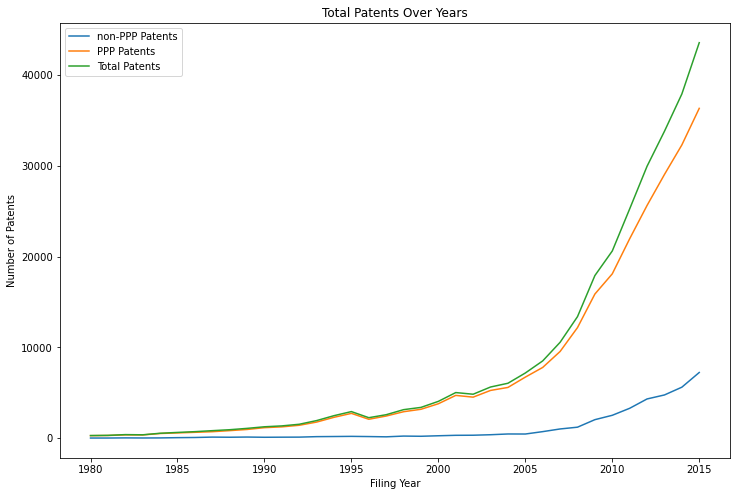

In [289]:
# 按年份和 'PPP' 列进行分组，并计算每组的数量
grouped_data = df_patent.groupby(['appln_filing_year', 'PPP']).size().unstack(fill_value=0)
grouped_data = grouped_data[grouped_data.index.isin(range(1980,2021))]
# 计算每年总专利数量和核心专利数量
total_patents_per_year = grouped_data.sum(axis=1)
core_patents_per_year = grouped_data[1]  # 假设 1 表示核心专利

# 绘制折线图和柱状图合一的图
plt.figure(figsize=(12, 8))

# 柱状图
plt.plot(grouped_data.index, grouped_data[0], marker='', label='non-PPP Patents')
plt.plot(grouped_data.index, grouped_data[1], marker='', label='PPP Patents')
plt.plot(grouped_data.index, grouped_data.sum(axis=1), marker='', label='Total Patents')

# 设置图表标题和标签
plt.title('Total Patents Over Years')
plt.xlabel('Filing Year')
plt.ylabel('Number of Patents')

# 显示图例
plt.legend()
plt.savefig('image/patent_over_year.png', format='png', bbox_inches='tight')

# 显示图表
plt.show()

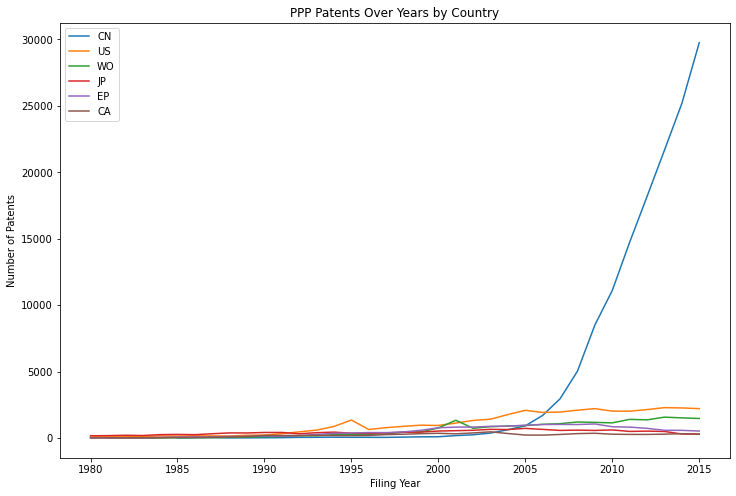

In [290]:
# 按年份和 'PPP' 列进行分组，并计算每组的数量
grouped_data = df_patent.groupby(['appln_auth', 'appln_filing_year', 'PPP']).size().unstack(fill_value=0).reset_index()
grouped_data = grouped_data[grouped_data['appln_filing_year'].isin(range(1980,2021))]

# 计算每年各国总专利数量
total_patents_per_year = grouped_data.groupby(['appln_auth','appln_filing_year']).sum()

# 绘制折线图
plt.figure(figsize=(12, 8))

# 遍历每个国家，绘制折线图
for country in ['CN','US','WO','JP','EP', 'CA']:
    country_data = grouped_data[grouped_data['appln_auth'] == country]
    plt.plot(country_data['appln_filing_year'], country_data[1], marker='', label=country)

# 设置图表标题和标签
plt.title('PPP Patents Over Years by Country')
plt.xlabel('Filing Year')
plt.ylabel('Number of Patents')

# 显示图例
plt.legend()
plt.savefig('image/PPP Patents Over Years by Country.png', format='png', bbox_inches='tight')

# 显示图表
plt.show()

/tmp/ipykernel_30838/2767498745.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  plt.plot(country_data['appln_filing_year'], country_data.sum(axis=1), marker='', label=country)
/tmp/ipykernel_30838/2767498745.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  plt.plot(country_data['appln_filing_year'], country_data.sum(axis=1), marker='', label=country)
/tmp/ipykernel_30838/2767498745.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  plt.plot(country_data['appln_filing_year'], co

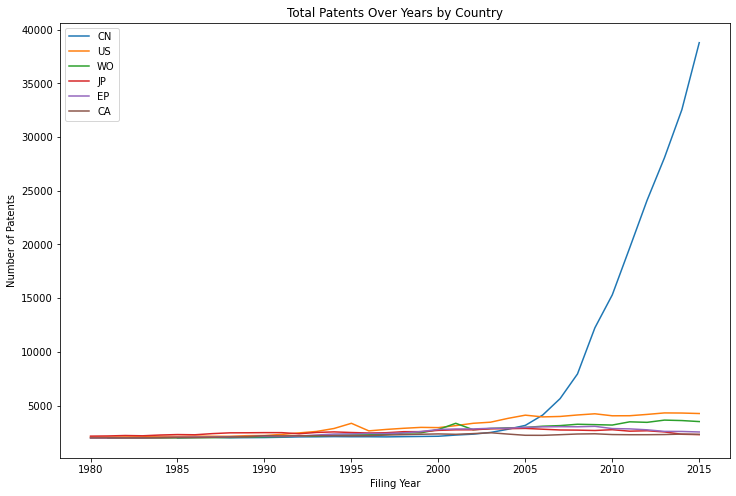

In [291]:
# 按年份和 'PPP' 列进行分组，并计算每组的数量
# 遍历每个国家，绘制折线图
plt.figure(figsize=(12, 8))

for country in ['CN','US','WO','JP','EP', 'CA']:
    country_data = grouped_data[grouped_data['appln_auth'] == country]
    plt.plot(country_data['appln_filing_year'], country_data.sum(axis=1), marker='', label=country)

# 设置图表标题和标签
plt.title('Total Patents Over Years by Country')
plt.xlabel('Filing Year')
plt.ylabel('Number of Patents')

# 显示图例
plt.legend()
plt.savefig('image/Total Patents Over Years by Country.png', format='png', bbox_inches='tight')

# 显示图表
plt.show()

In [292]:
df_patent['citation_count_5year']=df_patent['citation_count_5year'].fillna(0)

df_patent

,appln_id,person_id,invt_seq_nr,psn_name,psn_id,psn_sector,person_address,title,eid,doi,...,docdb_family_id,inpadoc_family_id,docdb_family_size,nb_citing_docdb_fam,nb_applicants,nb_inventors,citedby_count,cited_appln_id,citation_count_5year,PPP
0,416543665,239,4.0,"SAKAS, GEORGIOS",28185050,None,"Herdweg 81,64285 Darmstadt",Apparatus and method for ultrasound image acqu...,NaN,NaN,...,50424058.0,416543665.0,2.0,6.0,2.0,4.0,NaN,416543665,2.0,1
1,416543665,47124650,1.0,"FORZONI, LEONARDO",9059383,None,"Via Bure Vecchia Sud 11,I-51100 Pistoia",Apparatus and method for ultrasound image acqu...,NaN,NaN,...,50424058.0,416543665.0,2.0,6.0,2.0,4.0,NaN,416543665,2.0,1
2,25,114,2.0,"LI, XIAODONG",19358188,None,"Apt. 3, 3435 Waco Street,San Diego, CA 92117",T1R TASTE RECEPTORS AND GENES ENCODING SAME,NaN,NaN,...,26947173.0,25.0,37.0,78.0,1.0,5.0,NaN,NaN,0.0,1
3,25,117,5.0,"ZOZULYA, SERGEY",37553049,None,"14481 Yazoo Street,San Diego, CA 92129",T1R TASTE RECEPTORS AND GENES ENCODING SAME,NaN,NaN,...,26947173.0,25.0,37.0,78.0,1.0,5.0,NaN,NaN,0.0,1
4,25,115,3.0,"STASZEWSKI, LENA",30934537,None,"8270 Calle Nueva,San Diego, CA 92126",T1R TASTE RECEPTORS AND GENES ENCODING SAME,NaN,NaN,...,26947173.0,25.0,37.0,78.0,1.0,5.0,NaN,NaN,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394739,42794392,69298104,2.0,GUSTOV A.V.,11378519,None,None,METHOD FOR TREATING THE CASES OF MIGRAINE IN P...,NaN,NaN,...,32066523.0,42794392.0,1.0,0.0,0.0,4.0,NaN,NaN,0.0,1
394740,40228180,72019602,2.0,"CHOI, KANG JU",5040299,None,None,METHOD FOR PRODUCING GINSENOSIDE RG1,NaN,NaN,...,19568950.0,40228180.0,1.0,1.0,1.0,4.0,NaN,NaN,0.0,1
394741,40330252,72715392,1.0,LADAK HANIF M.,18509323,None,None,2 3 PROSTATE BOUNDARY SEGMENTATION FROM 2D AND...,NaN,NaN,...,23474607.0,984262.0,8.0,51.0,1.0,4.0,NaN,NaN,0.0,1
394742,40542850,73249466,4.0,"KANG, TAE CHEON",16310666,None,None,Anticonvulsant containing imperatorin and/or f...,NaN,NaN,...,37334174.0,40542850.0,1.0,2.0,2.0,8.0,NaN,NaN,0.0,1


# time lag

In [293]:
df_record.columns

Index(['appln_id', 'title', 'eid', 'doi', 'source_id', 'title_embedding',
       'labels', 'appln_auth', 'appln_nr', 'appln_kind', 'appln_filing_date',
       'appln_filing_year', 'appln_nr_original', 'ipr_type',
       'receiving_office', 'internat_appln_id', 'int_phase', 'reg_phase',
       'nat_phase', 'earliest_filing_date', 'earliest_filing_year',
       'earliest_filing_id', 'earliest_publn_date', 'earliest_publn_year',
       'earliest_pat_publn_id', 'granted', 'docdb_family_id',
       'inpadoc_family_id', 'docdb_family_size', 'nb_citing_docdb_fam',
       'nb_applicants', 'nb_inventors', 'citedby_count', 'cited_appln_id',
       'citation_count_5year', 'coverDate', 'afid', 'affilname',
       'affiliation_city', 'affiliation_country', 'author_count',
       'author_names', 'author_ids', 'author_afids', 'openaccess',
       'freetoread', 'freetoreadLabel', 'fund_acr', 'fund_no', 'fund_sponsor'],
      dtype='object')

In [294]:
df_ppp=df_ppp.merge(df_record[['appln_id','appln_filing_date','appln_filing_year','appln_auth']],left_on='appln_id',right_on='appln_id')
df_ppp=df_ppp.merge(df_record[['eid','coverDate']],left_on='eid',right_on='eid')


In [295]:
df_ppp['time_lag']=df_ppp['coverDate']-df_ppp['appln_filing_date']
df_ppp['time_lag']=df_ppp['time_lag'].apply(lambda x:x.days/365)

/tmp/ipykernel_30838/2594595657.py:1: PerformanceWarning: Adding/subtracting object-dtype array to DatetimeArray not vectorized.
  df_ppp['time_lag']=df_ppp['coverDate']-df_ppp['appln_filing_date']


In [296]:
df_time_lag=df_ppp.sort_values(['eid','time_lag'])[['author_id', 'person_id','eid','appln_id','coverDate','appln_filing_date','time_lag']]
df_time_lag=df_time_lag.drop_duplicates(['appln_id', 'person_id'],keep='first')
df_time_lag

,author_id,person_id,eid,appln_id,coverDate,appln_filing_date,time_lag
8460228,35466054000,30985100,2-s2.0-0000000863,39097280,1991-01-01,2005-11-30 00:00:00,-14.923288
9392742,36014450000,16154209,2-s2.0-0000001067,333682295,1997-01-01,2010-10-22 00:00:00,-13.813699
8744179,7202164137,8698596,2-s2.0-0000001069,51662104,1997-01-01,2006-10-03 00:00:00,-9.758904
8614090,7006102710,37002324,2-s2.0-0000001398,45686315,1998-01-01,2003-01-03 00:00:00,-5.008219
8614092,7006102710,37002324,2-s2.0-0000001398,47398978,1998-01-01,1998-08-13 00:00:00,-0.613699
...,...,...,...,...,...,...,...
9253233,7102103132,19630091,2-s2.0-9144245598,38222522,2004-01-01,2003-09-05 00:00:00,0.323288
9253234,7102103132,19630091,2-s2.0-9144245598,38222534,2004-01-01,2003-09-05 00:00:00,0.323288
9699354,7003783500,13094258,2-s2.0-9544227359,45150674,1996-09-26,2002-04-23 00:00:00,-5.575342
9407313,57204257356,16452683,2-s2.0-9944253283,57355815,2005-01-06,2006-10-06 00:00:00,-1.747945


In [297]:
pd.DataFrame([-1,-2,-3,1,2,3]).sort_values([0])

,0
2,-3
1,-2
0,-1
3,1
4,2
5,3


In [298]:
# 先有专利，后有的论文，所以time_lag是正的，选择绝对值最小的，因此是first
df_patent_time_lag=df_time_lag[df_time_lag['time_lag']>0].drop_duplicates(['person_id','appln_id'],keep='first')
df_patent_time_lag

,author_id,person_id,eid,appln_id,coverDate,appln_filing_date,time_lag
8614089,7006102710,5285887,2-s2.0-0000001398,54106902,1998-01-01,1997-08-13 00:00:00,0.386301
8614088,7006102710,5285887,2-s2.0-0000001398,53559340,1998-01-01,1997-02-26 00:00:00,0.846575
8614087,7006102710,5285887,2-s2.0-0000001398,50537007,1998-01-01,1995-02-23 00:00:00,2.857534
4825082,56091532400,19778854,2-s2.0-0000004392,26120397,1987-01-01,1983-02-14 00:00:00,3.882192
4825083,56091532400,19778854,2-s2.0-0000004392,34105658,1987-01-01,1981-12-07 00:00:00,5.071233
...,...,...,...,...,...,...,...
8397119,57212152527,18750233,2-s2.0-85161432400,406103356,2022-09-01,2013-01-15 00:00:00,9.632877
8900512,7006926444,33960499,2-s2.0-9144236921,45637969,2004-01-01,2001-11-20 00:00:00,2.115068
4044971,35411113600,19850480,2-s2.0-9144242925,38186215,2004-01-01,2003-07-14 00:00:00,0.468493
9253233,7102103132,19630091,2-s2.0-9144245598,38222522,2004-01-01,2003-09-05 00:00:00,0.323288


In [299]:
df_patent_time_lag.columns

Index(['author_id', 'person_id', 'eid', 'appln_id', 'coverDate',
       'appln_filing_date', 'time_lag'],
      dtype='object')

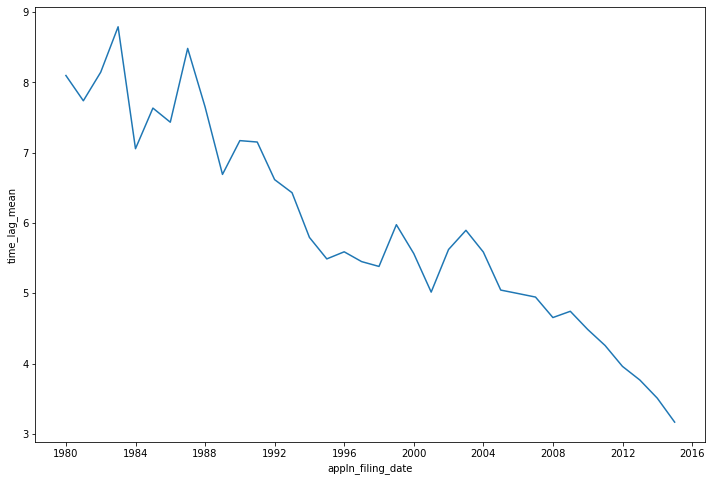

In [311]:
df_plot=df_patent_time_lag.groupby(
    [pd.Grouper(key='appln_filing_date', freq='Y',label='left')]).agg(    
    time_lag_mean=('time_lag','mean')).reset_index()
df_plot
plt.figure(figsize=(12, 8))

sns.lineplot(df_plot,x='appln_filing_date',y='time_lag_mean')
plt.savefig('image/Time lag.png', format='png', bbox_inches='tight')


In [301]:
# 先有论文，后有的专利，所以time_lag是负的，选择绝对值最小的，因此是last
df_paper_time_lag=df_time_lag[df_time_lag['time_lag']<0].drop_duplicates(['person_id','eid'],keep='last')
df_paper_time_lag

,author_id,person_id,eid,appln_id,coverDate,appln_filing_date,time_lag
8460228,35466054000,30985100,2-s2.0-0000000863,39097280,1991-01-01,2005-11-30 00:00:00,-14.923288
9392742,36014450000,16154209,2-s2.0-0000001067,333682295,1997-01-01,2010-10-22 00:00:00,-13.813699
8744179,7202164137,8698596,2-s2.0-0000001069,51662104,1997-01-01,2006-10-03 00:00:00,-9.758904
8614091,7006102710,37002324,2-s2.0-0000001398,47384058,1998-01-01,1998-02-26 00:00:00,-0.153425
6719967,36051435500,53423558,2-s2.0-0000002132,443100461,1991-07-01,2015-01-26 00:00:00,-23.589041
...,...,...,...,...,...,...,...
9253232,7102103132,19630091,2-s2.0-9144245598,7919059,2004-01-01,2004-09-03 00:00:00,-0.673973
9253230,7102103132,713871,2-s2.0-9144245598,16102761,2004-01-01,2004-08-31 00:00:00,-0.665753
9699354,7003783500,13094258,2-s2.0-9544227359,45150674,1996-09-26,2002-04-23 00:00:00,-5.575342
9407313,57204257356,16452683,2-s2.0-9944253283,57355815,2005-01-06,2006-10-06 00:00:00,-1.747945


In [303]:
df_paper_time_lag=df_paper_time_lag.merge(df_ppp[['appln_id','appln_auth']],how='left',left_on='appln_id',right_on='appln_id')

In [304]:
five_big=['WO','EP','JP','KOR','CN','US']

In [305]:
df_paper_time_lag.loc[~df_paper_time_lag['appln_auth'].isin(five_big),'appln_auth']='Other'

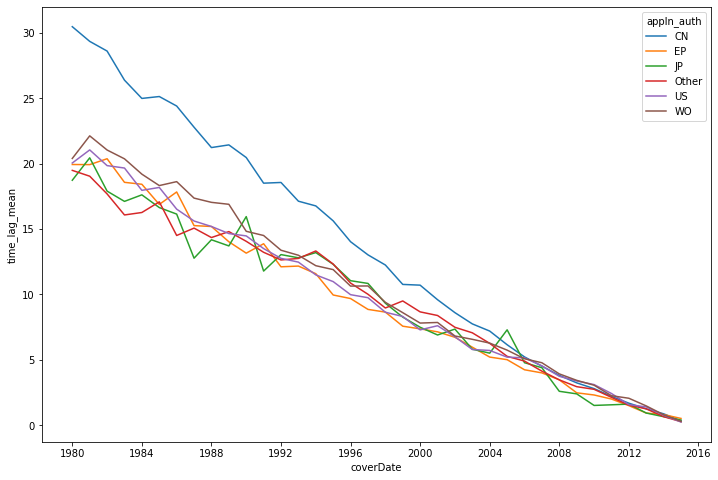

In [312]:
df_plot=df_paper_time_lag.groupby(
    [pd.Grouper(key='coverDate', freq='Y',label='left'),'appln_auth']).agg(    
    time_lag_mean=('time_lag','mean')).reset_index()
df_plot
plt.figure(figsize=(12, 8))

sns.lineplot(df_plot,x='coverDate',y=np.abs(df_plot['time_lag_mean']),hue='appln_auth')
plt.savefig('image/per nation time lag.png', format='png', bbox_inches='tight')


# 卡方检验

In [235]:
df_paper.columns

Index(['author_idx', 'author_id', 'author_name', 'eid', 'appln_id', 'title',
       'doi', 'source_id', 'title_embedding', 'labels', 'coverDate', 'afid',
       'affilname', 'affiliation_city', 'affiliation_country', 'author_count',
       'author_names', 'author_ids', 'author_afids', 'openaccess',
       'freetoread', 'freetoreadLabel', 'fund_acr', 'fund_no', 'fund_sponsor',
       'PPP', 'coverDate_year'],
      dtype='object')

In [236]:
# print('科学转换的专利五年内平均被引',df_ppp[(df_ppp['PPP']==1)&(df_ppp['appln_id'].notnull())]['citation_count_5year'].mean())
# print('非科学转换的专利五年内平均被引',df_ppp[(df_ppp['PPP']==0)&(df_ppp['appln_id'].notnull())]['citation_count_5year'].mean())

# print('科学转换的论文五年内平均被引',df_ppp[(df_ppp['PPP']==1)&(df_ppp['eid'].notnull())]['citedby_count'].mean())
# print('非科学转换的论文五年内平均被引',df_ppp[(df_ppp['PPP']==0)&(df_ppp['eid'].notnull())]['citedby_count'].mean())

In [244]:
print('科学转换的专利五年内平均被引',df_patent[(df_patent['PPP']==1)&(df_patent['appln_id'].notnull())]['citation_count_5year'].mean())
print('非科学转换的专利五年内平均被引',df_patent[(df_patent['PPP']==0)&(df_patent['appln_id'].notnull())]['citation_count_5year'].mean())

print('科学转换的论文五年内平均被引',df_paper[(df_paper['PPP']==1)&(df_paper['eid'].notnull())]['citedby_count'].mean())
print('非科学转换的论文五年内平均被引',df_paper[(df_paper['PPP']==0)&(df_paper['eid'].notnull())]['citedby_count'].mean())

科学转换的专利五年内平均被引 2.8960243268945245
非科学转换的专利五年内平均被引 1.6708925633210152
科学转换的论文五年内平均被引 58.505698829111864
非科学转换的论文五年内平均被引 40.21062319534833


In [246]:
from scipy.stats import ranksums

# Perform Wilcoxon rank-sum test
statistic, p_value = ranksums(df_patent[(df_patent['PPP']==1)&(df_patent['appln_id'].notnull())]['citation_count_5year'].to_numpy(), 
                              df_patent[(df_patent['PPP']==0)&(df_patent['appln_id'].notnull())]['citation_count_5year'].to_numpy())

# Output the results
print("Wilcoxon rank-sum statistic:", statistic)
print("P-value:", p_value)

Wilcoxon rank-sum statistic: 29.995217968551476
P-value: 1.1328936536106955e-197


In [247]:
# Perform Wilcoxon rank-sum test
statistic, p_value = ranksums(df_paper[(df_paper['PPP']==1)&(df_paper['eid'].notnull())]['citedby_count'].to_numpy(), 
                              df_paper[(df_paper['PPP']==0)&(df_paper['eid'].notnull())]['citedby_count'].to_numpy())

# Output the results
print("Wilcoxon rank-sum statistic:", statistic)
print("P-value:", p_value)

Wilcoxon rank-sum statistic: 195.26498018716296
P-value: 0.0


# 主效应模型

In [249]:
df_patent.columns

Index(['appln_id', 'person_id', 'invt_seq_nr', 'psn_name', 'psn_id',
       'psn_sector', 'person_address', 'title', 'eid', 'doi', 'source_id',
       'labels', 'appln_auth', 'appln_nr', 'appln_kind', 'appln_filing_date',
       'appln_filing_year', 'appln_nr_original', 'ipr_type',
       'receiving_office', 'internat_appln_id', 'int_phase', 'reg_phase',
       'nat_phase', 'earliest_filing_date', 'earliest_filing_year',
       'earliest_filing_id', 'earliest_publn_date', 'earliest_publn_year',
       'earliest_pat_publn_id', 'granted', 'docdb_family_id',
       'inpadoc_family_id', 'docdb_family_size', 'nb_citing_docdb_fam',
       'nb_applicants', 'nb_inventors', 'citedby_count', 'cited_appln_id',
       'citation_count_5year', 'PPP'],
      dtype='object')

In [250]:
from linearmodels.panel import PanelOLS#
mod = PanelOLS.from_formula("citation_count_5year ~ PPP+docdb_family_size+labels+nb_citing_docdb_fam+nb_applicants+nb_inventors+EntityEffects",
                            data=df_patent.set_index(['person_id',"appln_filing_year"]), check_rank=False)

result = mod.fit(cov_type='clustered', cluster_entity=True)
result.summary.tables[1]

,Parameter,Std. Err.,T-stat,P-value,Lower CI,Upper CI
PPP,0.1872,0.0457,4.0986,0.0000,0.0977,0.2768
docdb_family_size,-0.0604,0.0160,-3.7711,0.0002,-0.0917,-0.0290
labels,8.741e-05,9.808e-06,8.9123,0.0000,6.819e-05,0.0001
nb_citing_docdb_fam,0.0777,0.0063,12.266,0.0000,0.0653,0.0901
nb_applicants,0.4646,0.0392,11.847,0.0000,0.3877,0.5415
nb_inventors,0.0378,0.0049,7.6660,0.0000,0.0281,0.0474


In [253]:
df_paper.columns

Index(['author_idx', 'author_id', 'author_name', 'eid', 'appln_id', 'title',
       'doi', 'source_id', 'labels', 'coverDate', 'afid', 'affilname',
       'affiliation_city', 'affiliation_country', 'author_count',
       'author_names', 'author_ids', 'author_afids', 'openaccess',
       'freetoread', 'freetoreadLabel', 'fund_acr', 'fund_no', 'fund_sponsor',
       'citedby_count', 'PPP', 'coverDate_year'],
      dtype='object')

In [251]:
df_paper['author_count']=df_paper['author_count'].astype(float).astype(int)
df_paper['openaccess']=df_paper['openaccess'].astype(float).astype(int)


In [254]:
from linearmodels.panel import PanelOLS#
mod = PanelOLS.from_formula("citedby_count ~ PPP+author_count+labels+openaccess+EntityEffects",
                            data=df_paper.set_index(['author_id',"coverDate_year"]), check_rank=False)

result = mod.fit(cov_type='clustered', cluster_entity=True)
result.summary.tables[1]

,Parameter,Std. Err.,T-stat,P-value,Lower CI,Upper CI
PPP,15.345,0.2893,53.033,0.0000,14.778,15.912
author_count,1.9273,0.0473,40.727,0.0000,1.8346,2.0201
labels,0.0028,8.521e-05,33.390,0.0000,0.0027,0.0030
openaccess,-1.0009,0.2689,-3.7229,0.0002,-1.5279,-0.4740


# 描述分析

In [113]:
print('总数',len(df_record))
print('论文',len(df_record[df_record['doi'].notnull()]))
print('专利',len(df_record[df_record['appln_id'].notnull()]))
print('无法聚类',len(df_record[df_record['labels']==-1]))


总数 29545080
论文 22969543
专利 6575537
无法聚类 17719042


In [115]:
print('总数',sum(df_topic['record_count']))
print('论文',sum(df_topic['doi_count']))
print('专利',sum(df_topic['appln_count']))
print('论文占比',np.mean(df_topic['sci_rate']))


总数 11659009
论文 9378395
专利 2280614
论文占比 0.7784755187407203


In [117]:
print('专利和论文都有的聚类',len(df_topic[(df_topic['appln_rate']>0)&(df_topic['appln_rate']<1)]))
print('只有论文的聚类',len(df_topic[df_topic['appln_rate']==0]))
print('只有专利的聚类',len(df_topic[df_topic['appln_rate']==1]))


专利和论文都有的聚类 4375
只有论文的聚类 291
只有专利的聚类 12


# 生成GitHub

In [2]:
import pandas as pd

query = 'SELECT t."appln_id", t."appln_kind", t."appln_auth", t."appln_nr_original" FROM "biotechnology_basic_info" t'
df_basic_info=pd.read_sql(query, connection)
# df_scopus=pd.read_pickle('data/df_scopus.pickle')
df_basic_info['appln_id']=df_basic_info['appln_id'].astype(str)

/tmp/ipykernel_88032/1675333474.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_basic_info=pd.read_sql(query, connection)


In [3]:
query = 'SELECT t.* FROM "biotechnology_author_person_id" t'
df_person=pd.read_sql(query, connection)
# df_scopus=pd.read_pickle('data/df_scopus.pickle')
df_person['person_id']=df_person['person_id'].astype(str)

df_person

/tmp/ipykernel_88032/4241090110.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_person=pd.read_sql(query, connection)


,person_id,person_name
0,6645,"UMD, Inc."
1,10201,"Kwok, Philip Rodney"
2,10862,"Davies, Geraint"
3,20166,The University of Tokyo
4,29202,"BHATT, Ramesh"
...,...,...
12684953,85709390,"HUNAN ZHUOSHI CHUANGSI TECHNOLOGY CO., LTD."
12684954,85721157,"CHRISTIANSEN, Steven"
12684955,85614355,DAVID STÉPHANE PHILIPPE
12684956,85675180,XIAO YINGYAN


In [4]:
df_ppp=pd.read_pickle('version_3/df_ppp.pickle')

In [5]:
df_paper=pd.read_pickle('version_3/df_paper.pickle')
df_patent=pd.read_pickle('version_3/df_patent.pickle')

In [6]:
df_paper.columns

Index(['author_idx', 'author_id', 'author_name', 'eid', 'appln_id', 'title',
       'doi', 'source_id', 'labels', 'coverDate', 'afid', 'affilname',
       'affiliation_city', 'affiliation_country', 'author_count',
       'author_names', 'author_ids', 'author_afids', 'openaccess',
       'freetoread', 'freetoreadLabel', 'fund_acr', 'fund_no', 'fund_sponsor',
       'citedby_count', 'coverDate_year'],
      dtype='object')

In [7]:
df_paper_github=df_paper[['author_idx','author_name','title', 'doi']]
df_paper_github.to_csv('GitHub/paper.csv',encoding='utf-8-sig',index=None)
df_paper_github

,author_idx,author_name,title,doi
0,3,"Meksem, K.",Quantitative trait loci underlying resistance ...,10.1007/s13205-014-0211-3
1,5,"Gupta, Naveen",An extracellular thermo-alkali-stable laccase ...,10.1007/s13205-014-0207-z
2,4,"Jung, Jin Young",Evaluation of orange peel for biosurfactant pr...,10.1007/s13205-015-0362-x
3,3,"Han, Jeung Sul",MYB transcription factor isolated from Raphanu...,10.1007/s13205-016-0396-8
4,0,"Padmanabhan, Sasisanker",Delignification of miscanthus using ethylenedi...,10.1007/s13205-015-0344-z
...,...,...,...,...
4798115,1,"Lee, Seung Eun",Comparison of three antioxidants in chemical a...,10.1017/S0967199421000459
4798116,8,"Kim, Eun Young",Comparison of three antioxidants in chemical a...,10.1017/S0967199421000459
4798117,9,"Park, Se Pill",Comparison of three antioxidants in chemical a...,10.1017/S0967199421000459
4798118,1,"Li, Ming",PTEN expression in human cumulus cells is asso...,10.1017/S096719942200003X


In [8]:
df_patent.columns

Index(['appln_id', 'person_id', 'invt_seq_nr', 'psn_name', 'psn_id',
       'psn_sector', 'person_address', 'title', 'eid', 'doi', 'source_id',
       'labels', 'appln_auth', 'appln_nr', 'appln_kind', 'appln_filing_date',
       'appln_filing_year', 'appln_nr_original', 'ipr_type',
       'receiving_office', 'internat_appln_id', 'int_phase', 'reg_phase',
       'nat_phase', 'earliest_filing_date', 'earliest_filing_year',
       'earliest_filing_id', 'earliest_publn_date', 'earliest_publn_year',
       'earliest_pat_publn_id', 'granted', 'docdb_family_id',
       'inpadoc_family_id', 'docdb_family_size', 'nb_citing_docdb_fam',
       'nb_applicants', 'nb_inventors', 'citedby_count', 'cited_appln_id',
       'citation_count_5year'],
      dtype='object')

In [9]:
df_patent_github=df_patent[['person_id','appln_id','title']].merge(df_basic_info,how='left',left_on='appln_id',right_on='appln_id'
                                                                  ).merge(df_person,how='left',left_on='person_id',right_on='person_id')
df_patent_github.drop(['person_id','appln_id'],axis=1).to_csv('GitHub/patent.csv',encoding='utf-8-sig',index=None)
df_patent_github

,person_id,appln_id,title,appln_kind,appln_auth,appln_nr_original,person_name
0,239,416543665,Apparatus and method for ultrasound image acqu...,A,EP,14162769,"Sakas, Georgios"
1,47124650,416543665,Apparatus and method for ultrasound image acqu...,A,EP,14162769,"Forzoni, Leonardo"
2,114,25,T1R TASTE RECEPTORS AND GENES ENCODING SAME,A,EP,02720756,"LI, Xiaodong"
3,117,25,T1R TASTE RECEPTORS AND GENES ENCODING SAME,A,EP,02720756,"ZOZULYA, Sergey"
4,115,25,T1R TASTE RECEPTORS AND GENES ENCODING SAME,A,EP,02720756,"STASZEWSKI, Lena"
...,...,...,...,...,...,...,...
323779,69425491,482247140,Intervention type ultrasonic imaging system wi...,A,CN,201511009940,XU JIE
323780,72019602,40228180,METHOD FOR PRODUCING GINSENOSIDE RG1,A,KR,1019980062264,"CHOI, KANG JU"
323781,72715392,40330252,2 3 PROSTATE BOUNDARY SEGMENTATION FROM 2D AND...,A,KR,1020000014119,LADAK HANIF M.
323782,73249466,40542850,Anticonvulsant containing imperatorin and/or f...,A,KR,1020020063972,"KANG, TAE CHEON"


In [10]:
df_ppp

,author_id,person_id,appln_id,eid,title_patent,title_patent_embedding,title_paper,title_paper_embedding
0,57632820300,9384898,52568004,2-s2.0-0031763766,Apparatus for high-frequency hyperthermia,"[-0.025418255, 0.021175724, -0.010950781, 0.04...","Relevance of a new impedance matching, or subt...","[-0.04350199, 0.057242382, 0.08935542, 0.04722..."
2,57632820300,9384898,52568004,2-s2.0-0029100367,Apparatus for high-frequency hyperthermia,"[-0.025418255, 0.021175724, -0.010950781, 0.04...",Newly developed transurethral radiofrequency t...,"[-0.025066769, 0.01963685, -0.013115113, 0.046..."
3,57632820300,9384898,52568004,2-s2.0-0032877310,Apparatus for high-frequency hyperthermia,"[-0.025418255, 0.021175724, -0.010950781, 0.04...",Increased resistance of the radiosensitive M10...,"[-0.007280471, -0.00019821347, -0.001598425, 0..."
4,7005737279,5762813,46482242,2-s2.0-0036162128,Apparatus for inducing whole body hyperthermia...,"[0.01256757, 0.053632777, 0.026103154, 0.06149...",Pineal sarcoma,"[0.01589252, -0.0029651367, -0.031980623, 0.03..."
5,7005737279,5762813,46482242,2-s2.0-0025565999,Apparatus for inducing whole body hyperthermia...,"[0.01256757, 0.053632777, 0.026103154, 0.06149...",Whole body hyperthermia and intraperitoneal ca...,"[0.04816506, 0.025575764, -0.011186286, 0.0697..."
...,...,...,...,...,...,...,...,...
161364193,56256023400,79414020,524285915,2-s2.0-85143330794,ANALYSIS SOFTWARE AND DEVICE FOR EMBRYO SELECTION,"[-0.037560184, -0.00017279937, -0.040114272, -...",A novel system based on artificial intelligenc...,"[-0.024504505, -0.040670764, -0.066140614, 0.0..."
161364194,56256023400,79414020,524285915,2-s2.0-85098771593,ANALYSIS SOFTWARE AND DEVICE FOR EMBRYO SELECTION,"[-0.037560184, -0.00017279937, -0.040114272, -...",The Thickness and Density of the Ovarian Tunic...,"[0.036069196, -0.05324371, -0.07642056, 0.0484..."
161364195,56256023400,79414020,524285915,2-s2.0-84872533233,ANALYSIS SOFTWARE AND DEVICE FOR EMBRYO SELECTION,"[-0.037560184, -0.00017279937, -0.040114272, -...",The redox state of recombinant human serum alb...,"[-0.0299739, -0.037290357, -0.074311405, -0.00..."
161364196,56256023400,79414020,524285915,2-s2.0-84861119473,ANALYSIS SOFTWARE AND DEVICE FOR EMBRYO SELECTION,"[-0.037560184, -0.00017279937, -0.040114272, -...",The influence of the redox state of follicular...,"[-0.0037232393, -0.031841125, -0.086961515, 0...."


In [11]:
df_paper1=df_paper[['doi','eid']].drop_duplicates()
df_paper1

,doi,eid
0,10.1007/s13205-014-0211-3,2-s2.0-85009896689
1,10.1007/s13205-014-0207-z,2-s2.0-85008864359
2,10.1007/s13205-015-0362-x,2-s2.0-85015302975
3,10.1007/s13205-016-0396-8,2-s2.0-85017423684
4,10.1007/s13205-015-0344-z,2-s2.0-85017416810
...,...,...
4798110,10.1017/S0967199421000939,2-s2.0-85125791972
4798112,10.1017/S0967199421000770,2-s2.0-85125769983
4798115,10.1017/S0967199421000459,2-s2.0-85129295753
4798118,10.1017/S096719942200003X,2-s2.0-85128146377


In [18]:
df_paper2=df_paper[['author_id','author_name']].drop_duplicates('author_id')
df_paper2

,author_id,author_name
0,6603605218,"Meksem, K."
1,55328930900,"Gupta, Naveen"
2,55740777400,"Jung, Jin Young"
3,8277688900,"Han, Jeung Sul"
4,36775154800,"Padmanabhan, Sasisanker"
...,...,...
4797000,57221941898,"Li, Na"
4797043,57222520658,"Meng, Li"
4797053,57218694798,"Zechang, Xin"
4797075,57353983000,"Yingpu, Feng"


In [19]:
df_ppp_github=df_ppp.merge(df_basic_info,how='left',left_on='appln_id',right_on='appln_id'
                          ).merge(df_person,how='left',left_on='person_id',right_on='person_id'
                          ).merge(df_paper1,how='left',left_on='eid',right_on='eid'
                          ).merge(df_paper2,how='left',left_on='author_id',right_on='author_id')
df_ppp_github

,author_id,person_id,appln_id,eid,title_patent,title_patent_embedding,title_paper,title_paper_embedding,appln_kind,appln_auth,appln_nr_original,person_name,doi,author_name
0,57632820300,9384898,52568004,2-s2.0-0031763766,Apparatus for high-frequency hyperthermia,"[-0.025418255, 0.021175724, -0.010950781, 0.04...","Relevance of a new impedance matching, or subt...","[-0.04350199, 0.057242382, 0.08935542, 0.04722...",A,US,660351,Yamamoto; Itsuo,10.1080/028418698430458,"Yamamoto, Itsuo"
1,57632820300,9384898,52568004,2-s2.0-0029100367,Apparatus for high-frequency hyperthermia,"[-0.025418255, 0.021175724, -0.010950781, 0.04...",Newly developed transurethral radiofrequency t...,"[-0.025066769, 0.01963685, -0.013115113, 0.046...",A,US,660351,Yamamoto; Itsuo,10.3109/02656739509022495,"Yamamoto, Itsuo"
2,57632820300,9384898,52568004,2-s2.0-0032877310,Apparatus for high-frequency hyperthermia,"[-0.025418255, 0.021175724, -0.010950781, 0.04...",Increased resistance of the radiosensitive M10...,"[-0.007280471, -0.00019821347, -0.001598425, 0...",A,US,660351,Yamamoto; Itsuo,10.2307/3580332,"Yamamoto, Itsuo"
3,7005737279,5762813,46482242,2-s2.0-0036162128,Apparatus for inducing whole body hyperthermia...,"[0.01256757, 0.053632777, 0.026103154, 0.06149...",Pineal sarcoma,"[0.01589252, -0.0029651367, -0.031980623, 0.03...",A,US,053883,"Robins, H. Ian",10.1007/s701-002-8277-6,"Robins, H. I."
4,7005737279,5762813,46482242,2-s2.0-0025565999,Apparatus for inducing whole body hyperthermia...,"[0.01256757, 0.053632777, 0.026103154, 0.06149...",Whole body hyperthermia and intraperitoneal ca...,"[0.04816506, 0.025575764, -0.011186286, 0.0697...",A,US,053883,"Robins, H. Ian",10.1007/978-1-4684-5766-7_18,"Robins, H. I."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145582789,56256023400,79414020,524285915,2-s2.0-85143330794,ANALYSIS SOFTWARE AND DEVICE FOR EMBRYO SELECTION,"[-0.037560184, -0.00017279937, -0.040114272, -...",A novel system based on artificial intelligenc...,"[-0.024504505, -0.040670764, -0.066140614, 0.0...",A,EP,19824617,OTSUKI Junko,10.1002/rmb2.12443,"Otsuki, Junko"
145582790,56256023400,79414020,524285915,2-s2.0-85098771593,ANALYSIS SOFTWARE AND DEVICE FOR EMBRYO SELECTION,"[-0.037560184, -0.00017279937, -0.040114272, -...",The Thickness and Density of the Ovarian Tunic...,"[0.036069196, -0.05324371, -0.07642056, 0.0484...",A,EP,19824617,OTSUKI Junko,10.1007/s43032-020-00390-5,"Otsuki, Junko"
145582791,56256023400,79414020,524285915,2-s2.0-84872533233,ANALYSIS SOFTWARE AND DEVICE FOR EMBRYO SELECTION,"[-0.037560184, -0.00017279937, -0.040114272, -...",The redox state of recombinant human serum alb...,"[-0.0299739, -0.037290357, -0.074311405, -0.00...",A,EP,19824617,OTSUKI Junko,10.3109/19396368.2012.727946,"Otsuki, Junko"
145582792,56256023400,79414020,524285915,2-s2.0-84861119473,ANALYSIS SOFTWARE AND DEVICE FOR EMBRYO SELECTION,"[-0.037560184, -0.00017279937, -0.040114272, -...",The influence of the redox state of follicular...,"[-0.0037232393, -0.031841125, -0.086961515, 0....",A,EP,19824617,OTSUKI Junko,10.3109/19396368.2012.675004,"Otsuki, Junko"


In [20]:
df_ppp_github.drop(['author_id','person_id','appln_id','eid','title_patent_embedding','title_paper_embedding'],axis=1).to_csv('GitHub/patent-paper-pair.csv',encoding='utf-8-sig',index=None)

In [21]:
df_ppp_github.drop(['author_id','person_id','appln_id','eid','title_patent_embedding','title_paper_embedding'],axis=1).columns

Index(['title_patent', 'title_paper', 'appln_kind', 'appln_auth',
       'appln_nr_original', 'person_name', 'doi', 'author_name'],
      dtype='object')